In [10112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', None)

In [10113]:
seed = np.random.seed(42)

In [10114]:
# plt.figure(figsize = (20,10))
# sns.scatterplot(x = 'month' , y = 'sellin' , data = new, hue = 'year');

In [10115]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

dic = pd.read_csv('DataDictionary.csv')

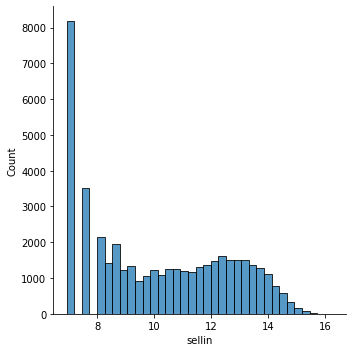

In [10116]:
sns.displot(np.log(train['sellin']));

In [10117]:
train.head(10)

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
0,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,7,2016,U,0.000000,0,0,0,1,0,1
1,YOSHWARDTERR,0,2026,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,0,95,2,2017,U,0.000000,0,0,0,1,0,0
2,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,5,2017,U,0.000000,0,0,0,1,0,0
3,YOSHUANEMARX,0,320108,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,0,23299,155,4,2018,W,0.270966,1,1,0,0,1,1
4,YOSHUANEMARX,0,132703,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,0,7091,0,21273,155,5,2018,W,0.063004,0,1,0,0,1,0
5,YOSHUANEMARX,0,168158,0,0,151950,6078,0,8104,0,0,96235,353537,71923,0,4052,76988,0,4052,5065,1013,3039,0,2026,0,32416,267432,9117,21273,0,0,4052,0,19247,155,6,2018,W,0.000000,0,1,0,0,1,0
6,YOSHUANEMARX,0,43559,0,6078,34442,0,0,0,0,0,65845,332264,-22286,0,1013,56728,4052,1013,0,0,0,0,3039,0,31403,254263,5065,21273,0,0,4052,0,16208,155,7,2018,W,0.000000,0,0,0,0,1,1
7,YOSHUANEMARX,0,22286,0,0,17221,4052,0,0,0,0,64832,283640,-42546,0,0,62806,1013,0,0,0,0,0,1013,0,30390,206652,8104,19247,0,0,4052,0,15195,155,8,2018,W,0.000000,0,0,0,0,1,0
8,YOSHUANEMARX,0,146885,0,9117,137768,0,0,0,0,0,76988,336316,69897,0,0,73949,2026,0,0,0,1013,0,0,0,30390,262367,6078,18234,0,0,4052,0,15195,155,9,2018,W,0.000000,0,0,0,0,1,1
9,YOSHUANEMARX,0,46598,1013,13169,31403,0,0,0,0,0,37481,313017,9117,0,0,34442,0,2026,0,0,0,0,1013,0,32416,231977,8104,16208,0,0,4052,0,20260,155,10,2018,W,0.000000,0,0,0,0,1,0


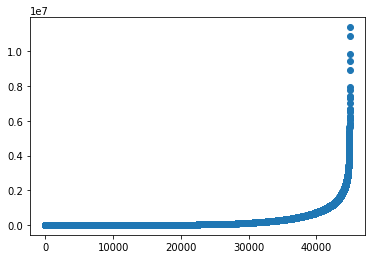

In [10118]:
plt.scatter(range(train.shape[0]), np.sort(train['sellin'].values))

In [10119]:
train.shape

(44907, 45)

In [10120]:
pd.set_option('display.max_rows', 1700)
pd.set_option('display.max_columns', 50)

In [10121]:
train['sku_name'].nunique()

3868

In [10122]:
test['sku_name'].nunique()

382

In [10123]:
train['product_lifecycle_stage'].nunique()

15

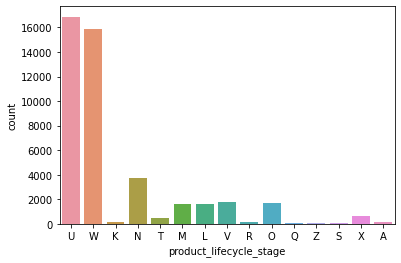

In [10124]:
sns.countplot(train['product_lifecycle_stage']);

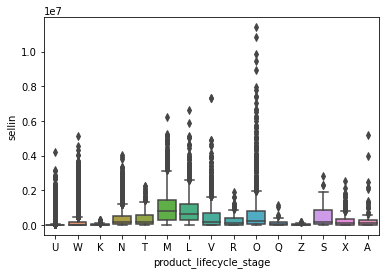

In [10125]:
sns.boxplot(x = 'product_lifecycle_stage', y = 'sellin' , data = train);

In [10126]:
dic

,Column Name,Description
0,sku_name,Product SKU
1,starting_inventory,Starting inventory at the beginning of the mon...
2,sellin,The sellin or demand. What is sold in to our c...
3,sellin_channel_1,The sellin for channel 1
4,sellin_channel_2,The sellin for channel 2
5,sellin_channel_3,The sellin for channel 3
6,sellin_channel_4,The sellin for channel 4
7,sellin_channel_5,The sellin for channel 5
8,sellin_channel_6,The sellin for channel 6
9,sellin_channel_7,The sellin for channel 7


In [10127]:
train.describe()

,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
count,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,44907.000000,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,44907.000000,44907.000000,4.490700e+04,44907.000000,4.490700e+04,44907.000000,44907.000000,44907.000000,44907.000000,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,44907.000000,44907.0,4.490700e+04,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000
mean,3.648297e+05,2.469533e+05,1.307605e+05,3.396829e+04,2.309661e+04,1.484062e+04,9593.847863,8.523664e+03,7.648266e+03,5.769433e+03,1.487073e+05,7.355678e+05,9.824593e+04,7.713255e+04,11423.054223,18712.065981,1.858051e+04,6575.826553,5.870446e+03,3618.981807,569.041308,1649.398691,4575.474692,4.025671e+05,6.823409e+04,1.037787e+05,6.407817e+04,34814.202552,0.0,1.572348e+04,3470.687287,10724.554101,32186.407420,138.974815,6.495068,2017.872759,0.050180,0.123366,0.274924,0.012648,0.448037,0.539315,0.343733
std,1.307197e+06,5.396038e+05,3.671458e+05,1.016882e+05,6.618159e+04,1.018736e+05,42555.114234,3.072036e+04,4.096964e+04,4.092453e+04,3.446351e+05,1.264808e+06,3.896904e+05,2.576446e+05,27525.403417,40289.320846,8.705091e+04,17649.686982,2.425491e+04,13136.471159,1649.035377,6567.872377,11208.507419,9.069368e+05,1.319811e+05,1.645399e+05,2.076023e+05,76623.436604,0.0,4.943390e+04,7128.146054,38132.614829,62467.187665,35.100336,3.356170,1.626007,0.128661,0.328861,0.446481,0.111753,0.497298,0.498458,0.474958
min,0.000000e+00,-1.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.013000e+03,0.000000e+00,0.000000e+00,-6.787100e+04,-1.722100e+04,-9.177780e+06,-7.091000e+03,-9117.000000,-27351.000000,-6.078000e+03,-1013.000000,-6.989700e+04,-1013.000000,-2026.000000,-2026.000000,-8104.000000,-1.013000e+03,0.000000e+00,-7.192300e+04,-1.722100e+04,0.000000,0.0,0.000000e+00,0.000000,0.000000,-2026.000000,45.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,2.026000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.065000e+03,2.937700e+04,-1.823400e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.013000e+03,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,115.000000,4.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,2.228600e+04,1.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.013000e+03,0.000000e+00,0.000000e+00,3.646800e+04,2.107040e+05,0.000000e+00,2.026000e+03,0.000000,0.000000,1.013000e+03,1013.000000,1.013000e+03,0.000000,0.000000,0.000000,0.000000,1.924700e+04,3.039000e+03,4.052000e+03,4.052000e+03,9117.000000,0.0,0.000000e+00,0.000000,0.000000,3039.000000,135.000000,6.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.013000e+03,2.340030e+05,6.584500e+04,1.013000e+04,1.519500e+04,2.026000e+03,0.000000,7.091000e+03,0.000000e+00,0.000000e+00,1.489110e+05,8.529460e+05,7.496200e+04,4.862400e+04,7091.00000

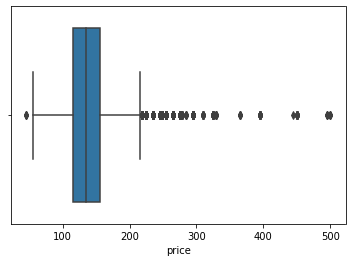

In [10128]:
sns.boxplot(train['price']);

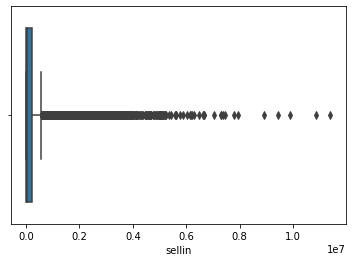

In [10129]:
sns.boxplot(train['sellin']);

In [10130]:
test['CAT_GENDER_MEN'].value_counts()

0    772
1    756
Name: CAT_GENDER_MEN, dtype: int64

In [10131]:
test.head()

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN
0,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,YOSHRENECARL,11,2021,0,0,1


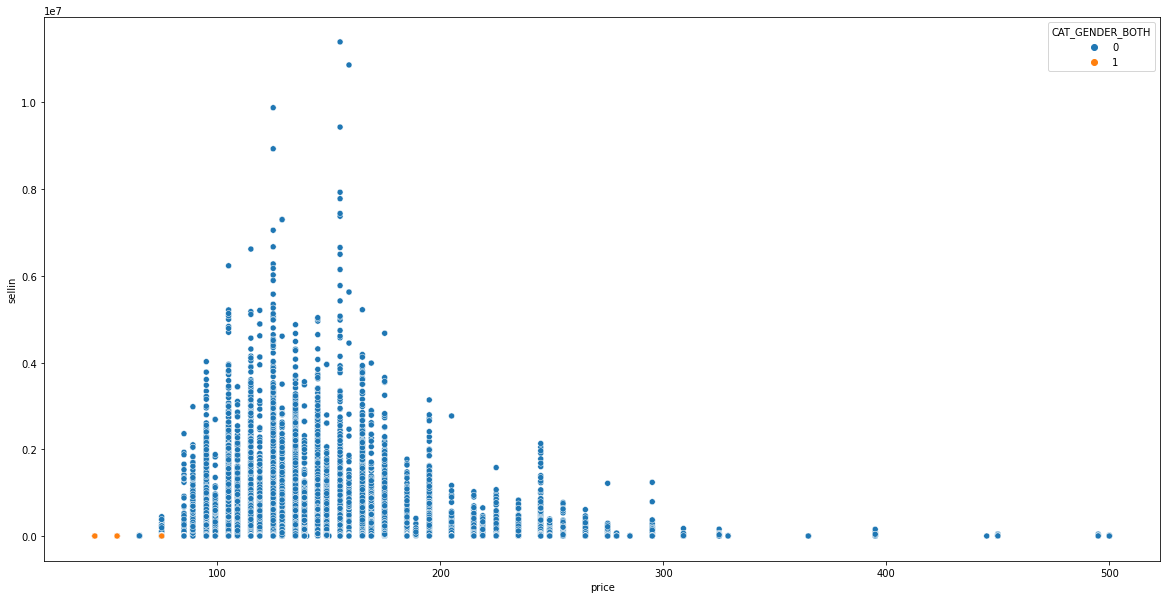

In [10132]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='price',y='sellin', data = train, hue ='CAT_GENDER_BOTH' );

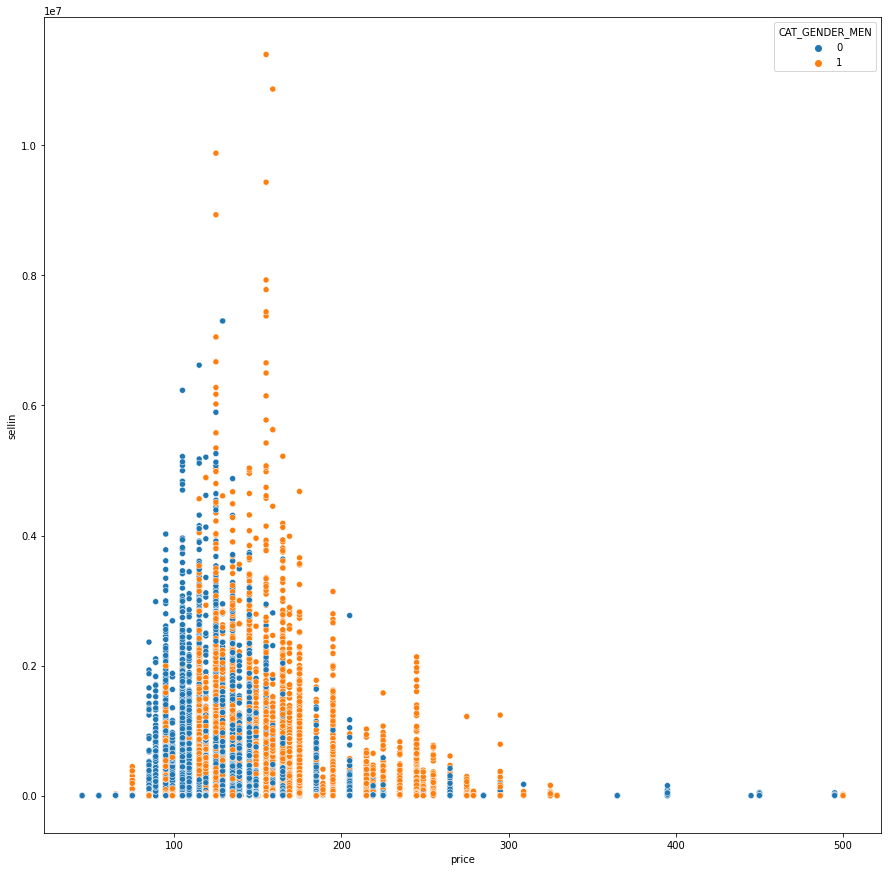

In [10133]:
plt.figure(figsize = (15,15))
sns.scatterplot(x='price',y='sellin', data = train, hue ='CAT_GENDER_MEN' );

<AxesSubplot:xlabel='CAT_GENDER_MEN', ylabel='price'>

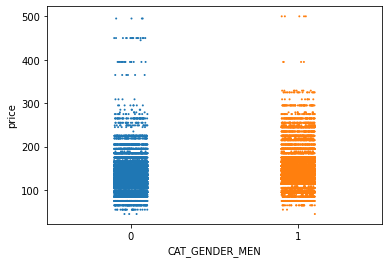

In [10134]:
sns.stripplot( x = 'CAT_GENDER_MEN', y='price', data = train, size = 2)

<AxesSubplot:xlabel='CAT_GENDER_WOMEN', ylabel='price'>

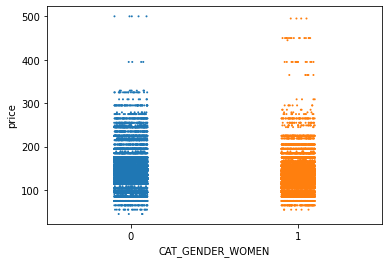

In [10135]:
sns.stripplot( x = 'CAT_GENDER_WOMEN', y='price', data = train , size  = 2)

<AxesSubplot:xlabel='CAT_GENDER_BOTH', ylabel='price'>

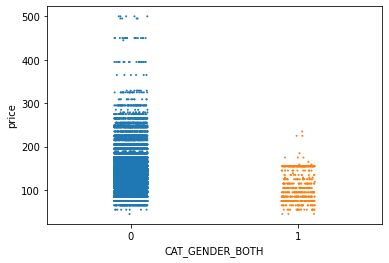

In [10136]:
sns.stripplot( x = 'CAT_GENDER_BOTH', y='price', data = train, size = 2)

In [10138]:
# plt.figure(figsize = (15,15))
# sns.heatmap(train[['starting_inventory','sellout','onhand_inventory','leftover_inventory','sellin','shift']].corr(), annot = True)

In [10139]:
# sns.heatmap(np.corr([1,2,3]), annot = True)

In [10140]:
# plt.figure(figsize = (40,40))
# train.groupby('sku_name')['sellin'].mean().head(50).plot(kind = 'bar')

In [10141]:
# plt.figure(figsize = (20,10))
# sns.countplot(train.groupby('sku_name')['price'].tail(1));

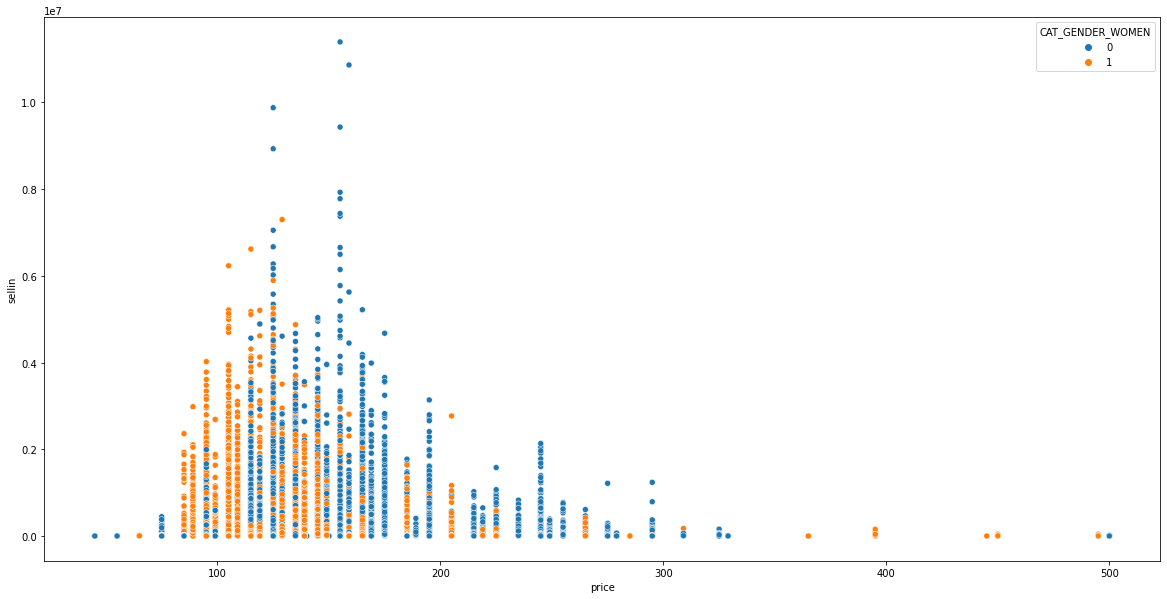

In [10142]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='price',y='sellin', data = train, hue ='CAT_GENDER_WOMEN' );

In [10143]:
train['price'].nunique()

50

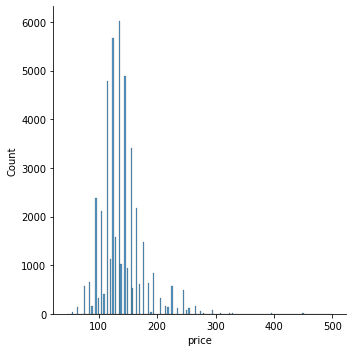

In [10144]:
sns.displot(train['price']);

In [10145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44900 entries, 0 to 44906
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sku_name                     44900 non-null  object 
 1   starting_inventory           44900 non-null  int64  
 2   sellin                       44900 non-null  int64  
 3   sellin_channel_1             44900 non-null  int64  
 4   sellin_channel_2             44900 non-null  int64  
 5   sellin_channel_3             44900 non-null  int64  
 6   sellin_channel_4             44900 non-null  int64  
 7   sellin_channel_5             44900 non-null  int64  
 8   sellin_channel_6             44900 non-null  int64  
 9   sellin_channel_7             44900 non-null  int64  
 10  sellin_channel_8             44900 non-null  int64  
 11  sellout                      44900 non-null  int64  
 12  onhand_inventory             44900 non-null  int64  
 13  leftover_invento

In [10146]:
print(train.sellin.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

0.00       -1013.00
0.05        1013.00
0.50       22286.00
0.95     1261235.65
0.99     2563953.65
1.00    11396250.00
Name: sellin, dtype: float64


In [10147]:
def outlier_thresholds(dataframe, col_name, q1_perc=0.05, q3_perc=0.95):
    """
    given dataframe, column name, q1_percentage and q3 percentage, function calculates low_limit and up_limit

    """
    quartile1 = dataframe[col_name].quantile(q1_perc)
    quartile3 = dataframe[col_name].quantile(q3_perc)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name, q1_perc=0.01, q3_perc=0.99):
    outlier_list = []
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1_perc=0.01, q3_perc=0.99)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True

    else:
        return False

In [10148]:
check_outlier(train,'sellin')

True

In [10149]:
train.groupby(["sku_name"]).agg({"sellin": ["sum", "mean", "median", "std"]})

sellin                                        
                     sum           mean    median            std
sku_name                                                        
ABEAHAMASHL     18107375  301789.583333  242107.0  291992.392344
ABEANDACORE      1758568  109910.500000   51156.5  128067.133628
ABEANHARLE       5005233  227510.590909   57234.5  333602.068732
ABEANNAONEI         1013    1013.000000    1013.0            NaN
ABEANNAONEIZZ     323147   32314.700000   19247.0   30124.143979
...                  ...            ...       ...            ...
YOSHTLYNYOSH      699983   46665.533333   28364.0   60615.123674
YOSHTLYNYOSHZZ   2492993  249299.300000  225899.0  155582.971760
YOSHUANEBART      265406   18957.571429    5065.0   46308.153982
YOSHUANEMARX     1734256   75402.434783   25325.0  109848.130430
YOSHWARDTERR        4052    1350.666667    1013.0     584.855823

[3868 rows x 4 columns]

In [10150]:
train['sellin'] = np.abs(train['sellin'])

In [10151]:
train.duplicated().any()

True

In [10152]:
train.shape

(44900, 45)

In [10153]:
train.head()

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
0,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,7,2016,U,0.000000,0,0,0,1,0,1
1,YOSHWARDTERR,0,2026,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,0,95,2,2017,U,0.000000,0,0,0,1,0,0
2,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,5,2017,U,0.000000,0,0,0,1,0,0
3,YOSHUANEMARX,0,320108,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,0,23299,155,4,2018,W,0.270966,1,1,0,0,1,1
4,YOSHUANEMARX,0,132703,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,0,7091,0,21273,155,5,2018,W,0.063004,0,1,0,0,1,0


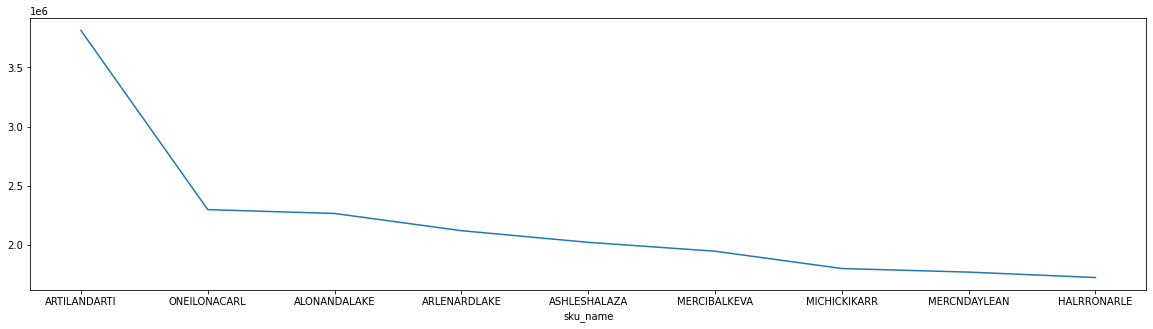

In [10154]:
plt.figure(figsize = (20,5))
train.groupby('sku_name')['sellin'].mean().sort_values(ascending = False).head(9).plot();

In [10155]:
train.groupby('sku_name')['sellin'].sum().sort_values(ascending = False).head(10)

sku_name
ARTILANDARTI    205854769
ONEILONACARL    138085069
ALONANDALAKE    136137070
ARLENARDLAKE    129555609
ASHLESHALAZA    121533662
MERCIBALKEVA    117044046
MICHICKIKARR    108279570
MERCNDAYLEAN    106470352
HALRRONARLE     103720057
LYNEUTHELAKE    101628212
Name: sellin, dtype: int64

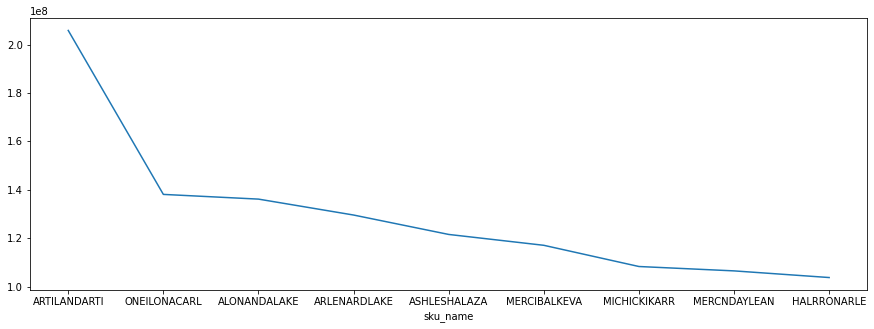

In [10156]:
plt.figure(figsize = (15,5))
train.groupby('sku_name')['sellin'].sum().sort_values(ascending = False).head(9).plot();

In [10157]:
train.groupby('sku_name')['sellin'].mean()

sku_name
ABEAHAMASHL       301789.583333
ABEANDACORE       109910.500000
ABEANHARLE        227510.590909
ABEANNAONEI         1013.000000
ABEANNAONEIZZ      32314.700000
                      ...      
YOSHTLYNYOSH       46665.533333
YOSHTLYNYOSHZZ    249299.300000
YOSHUANEBART       18957.571429
YOSHUANEMARX       75402.434783
YOSHWARDTERR        1350.666667
Name: sellin, Length: 3868, dtype: float64

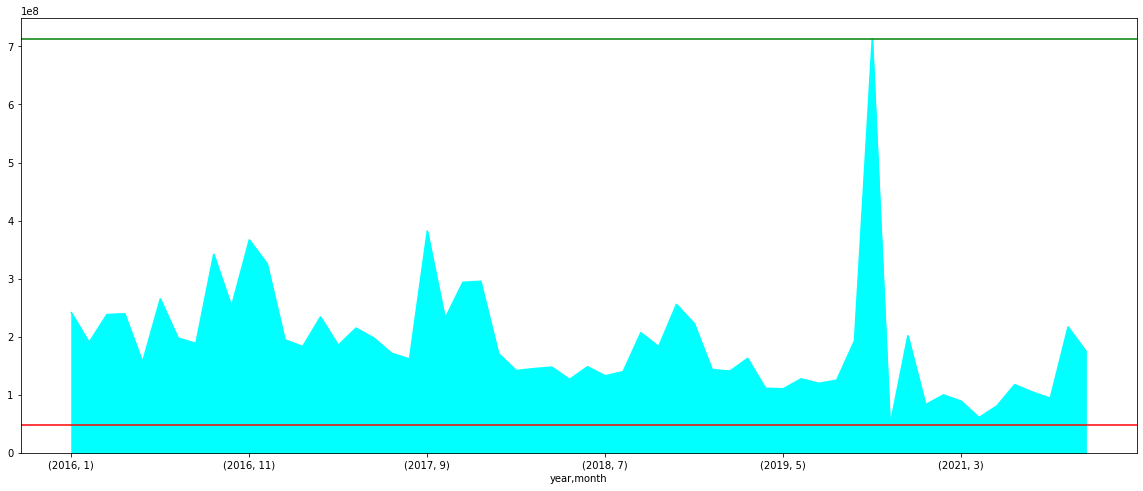

In [10158]:
plt.figure(figsize = (20,8))
trainSum = train.groupby(['year','month'])['sellin'].sum()
trainSum.plot(color = 'cyan',kind = 'area')
plt.axhline(trainSum.max() , color = 'g')
plt.axhline(trainSum.min() ,color = 'r')
plt.axis('on');

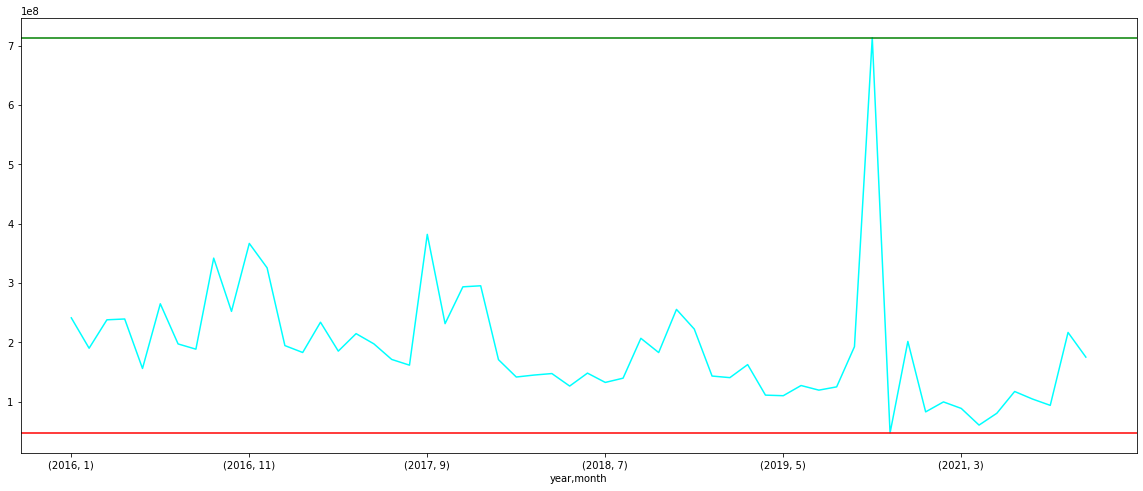

In [10159]:
plt.figure(figsize = (20,8))
trainSum = train.groupby(['year','month'])['sellin'].sum()
trainSum.plot(color = 'cyan')
plt.axhline(trainSum.max() , color = 'g')
plt.axhline(trainSum.min() ,color = 'r')
plt.axis('on');

In [10160]:
top_10_products_by_sum = train.groupby('sku_name')['sellin'].sum().sort_values(ascending = False).head(10).index.to_list()
print(top_10_products_by_sum)

['ARTILANDARTI', 'ONEILONACARL', 'ALONANDALAKE', 'ARLENARDLAKE', 'ASHLESHALAZA', 'MERCIBALKEVA', 'MICHICKIKARR', 'MERCNDAYLEAN', 'HALRRONARLE', 'LYNEUTHELAKE']


In [10161]:
train['sku_name'].value_counts(normalize = True).sort_values() * 100

REVAKEVAHOWA    0.002227
SIGRJAYEMAYN    0.002227
THORETTAARTI    0.002227
HOWAEDESERIC    0.002227
THORNALDISAA    0.002227
                  ...   
LAZAABELEAN     0.135857
LEANEIDAKATH    0.135857
MALIAHAMRICK    0.135857
MALILIAMBART    0.135857
BRITEIDALAKE    0.135857
Name: sku_name, Length: 3868, dtype: float64

In [10162]:
train['sku_name'].value_counts().sort_values()

REVAKEVAHOWA     1
SIGRJAYEMAYN     1
THORETTAARTI     1
HOWAEDESERIC     1
THORNALDISAA     1
                ..
LAZAABELEAN     61
LEANEIDAKATH    61
MALIAHAMRICK    61
MALILIAMBART    61
BRITEIDALAKE    61
Name: sku_name, Length: 3868, dtype: int64

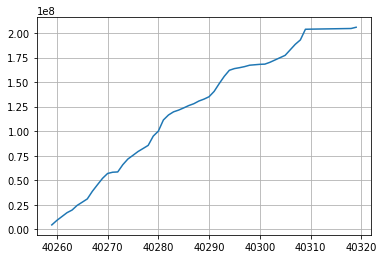

In [10163]:
train[train['sku_name'] == 'ARTILANDARTI']['sellin'].cumsum().plot(grid = True);

In [10165]:
train[train['sku_name'] == 'ARTILANDARTI']

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
40259,ARTILANDARTI,0,4572682,3516123,22286,528786,6078,0,94209,84079,0,2049299,7066688,2523383,1237886,232990,143846,-1013,114469,60780,101300,1013,99274,58754,4844166,363667,586527,8104,461928,0,197535,4052,411278,189431,155,1,2016,O,0.000000,0,0,0,1,0,1
40260,ARTILANDARTI,0,4611176,2434239,975519,177275,1013,91170,93196,173223,0,2063481,7725138,2547695,1369576,131690,208678,4052,81040,69897,82053,2026,71923,42546,5715346,421408,559176,5065,186392,0,191457,2026,419382,224886,155,2,2016,O,0.046875,0,0,0,1,0,0
40261,ARTILANDARTI,0,3912206,1827452,621982,291744,0,192470,72936,375823,0,2338004,7788957,1574202,1522539,149924,269458,0,109404,58754,106365,3039,72936,45585,5374978,642242,520682,4052,373797,0,176262,6078,473071,217795,155,3,2016,O,0.010638,0,1,0,1,0,0
40262,ARTILANDARTI,0,3926388,2636839,376836,251224,86105,136755,47611,44572,0,2027013,8109065,1899375,1242951,237042,191457,8104,122573,40520,65845,0,80027,38494,5629241,757724,552085,30390,388992,0,182340,2026,334290,231977,155,4,2016,O,0.023810,0,1,0,1,0,0
40263,ARTILANDARTI,0,2688502,1533682,426473,176262,5065,205639,57741,42546,0,2214418,7806178,474084,1267263,383927,207665,2026,97248,51663,108391,2026,52676,41533,5362822,707074,558163,33429,400135,0,219821,0,290731,234003,155,5,2016,O,0.000000,0,0,0,1,0,1
40264,ARTILANDARTI,0,4740840,2742191,317069,260341,5065,178288,93196,725308,0,2635826,7438459,2105014,1654229,243120,294783,6078,120547,83066,100287,1013,74962,57741,5048792,645281,505487,32416,437616,0,263380,1013,292757,211717,155,6,2016,O,0.015625,0,1,0,1,0,0
40265,ARTILANDARTI,0,3256795,1856829,442681,261354,4052,121560,60780,307952,0,2152625,7093026,1104170,1311835,172210,242107,4052,119534,48624,151950,2026,47611,52676,4734762,630086,530812,32416,452811,0,272497,3039,169171,267432,155,7,2016,O,0.000000,0,1,0,1,0,1
40266,ARTILANDARTI,0,3335809,2331926,149924,230964,4052,126625,76988,127638,0,2167820,7479992,1167989,1274354,259328,206652,2026,69897,67871,164106,3039,39507,81040,5152118,782036,499409,33429,301874,0,243120,21273,170184,276549,155,8,2016,O,0.000000,0,1,0,1,0,0
40267,ARTILANDARTI,0,7780853,5101468,745568,454837,4052,737464,84079,246159,0,2959986,8357250,4820867,1612696,224886,634138,4052,113456,64832,159041,2026,50650,94209,5779165,716191,595644,7091,423434,0,269458,24312,176262,365693,155,9,2016,O,0.000000,0,0,0,1,0,0
40268,ARTILANDARTI,0,6654397,5581630,241094,123586,2026,0,84079,178288,0,2486915,11426640,4167482,1434408,194496,424447,5065,120547,74962,117508,5065,51663,58754,9118013,596657,301874,6078,548033,0,291744,21273,182340,360628,155,10,2016,O,0.049268,0,0,0,1,0,1


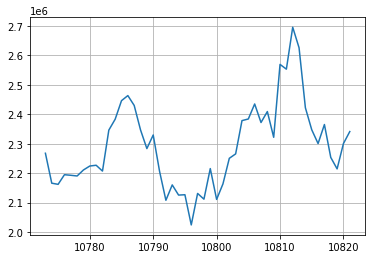

In [10166]:
train[train['sku_name'] == 'ONEILONACARL']['sellin'].rolling(12).mean().plot(grid = True);

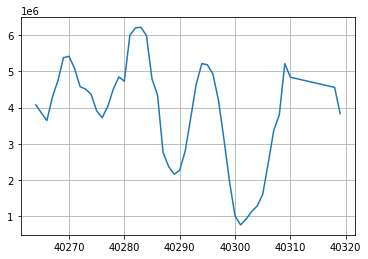

In [10167]:
train[train['sku_name'] == 'ARTILANDARTI']['sellin'].rolling(6).mean().plot(grid = True);

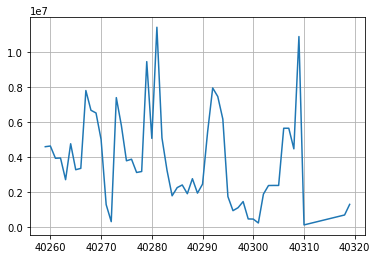

In [10168]:
train[train['sku_name'] == 'ARTILANDARTI']['sellin'].plot(grid = True);

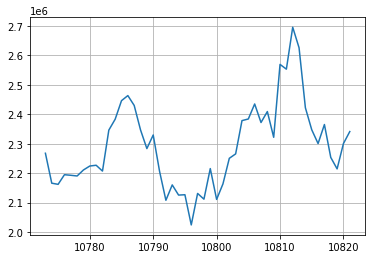

In [10169]:
train[train['sku_name'] == 'ONEILONACARL']['sellin'].rolling(12).mean().plot(grid = True);


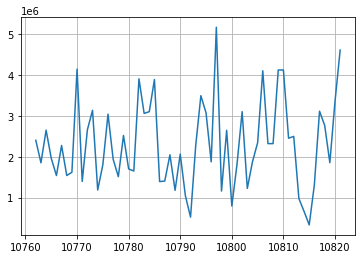

In [10170]:
train[train['sku_name'] == 'ONEILONACARL']['sellin'].plot(grid = True);

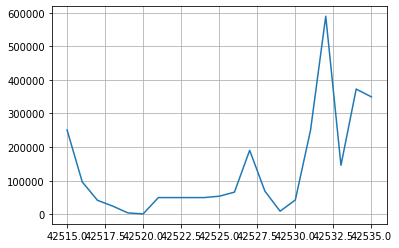

In [10171]:
train[train['sku_name'] == 'ANIBAHAMKARR']['sellin'].plot(grid = True);

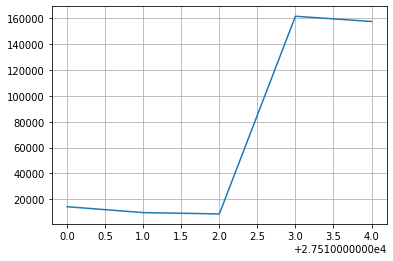

In [10172]:
train[train['sku_name'] == 'HOWAALLYLAZAZZ']['sellin'].rolling(2).mean().plot(grid = True);

In [10173]:
train[train['sku_name'] == 'ALONANDALAKE']['sellin'].tail(10)

43924     585514
43925    2142495
43926    1551916
43927     637177
43928     808374
43929    1573189
43930    1754516
43931    1214587
43932    3105858
43933    3027857
Name: sellin, dtype: int64

In [10174]:
train[train['sku_name'] == 'ARLENARDLAKE']['sellin'].tail(10)

41416     50650
41417      7091
41418     46598
41419     97248
41420     52676
41421     49637
41422     26338
41423      9117
41424    336316
41425    509539
Name: sellin, dtype: int64

<AxesSubplot:>

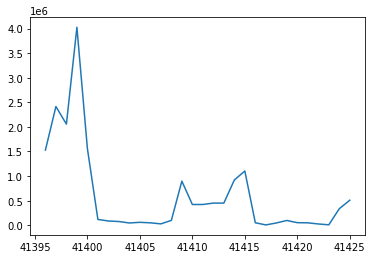

In [10175]:
train[train['sku_name'] == 'ARLENARDLAKE']['sellin'].tail(30).plot()

<AxesSubplot:>

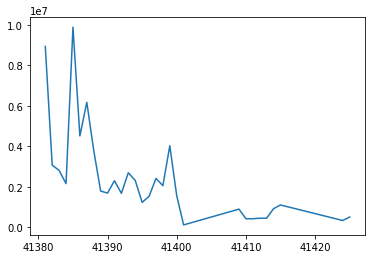

In [10177]:
train[train['sku_name'] == 'ARLENARDLAKE']['sellin'].tail(30).plot()

<AxesSubplot:>

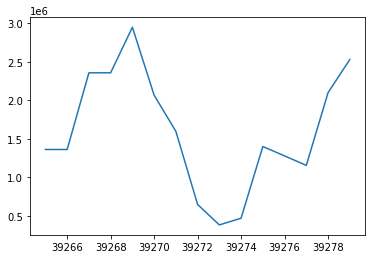

In [10178]:
train[train['sku_name'] == 'ASHLESHALAZA']['sellin'].tail(15).plot()

<AxesSubplot:>

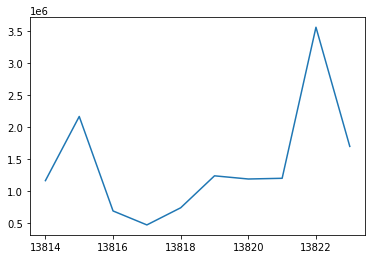

In [10179]:
train[train['sku_name'] == 'MERCIBALKEVA']['sellin'].tail(10).plot()

In [10180]:
train[train['sku_name'] == 'CINDIBALDONOZZ']['sellin'].tail(5)

35488      12156
35489      42546
35490       4052
35491    5204794
35492    3949687
Name: sellin, dtype: int64

In [10181]:
test['year'].unique()

array([2021, 2022], dtype=int64)

In [10182]:
def cumsums(df):
    colors = ['b','g','r','c','m','k','y','cyan','magenta','r']
    fig, axs = plt.subplots(1,len(top_10_products_by_sum),figsize=(20,5),sharey=True,sharex=True)
    i = 0
    for product in top_10_products_by_sum:
        cumulative = df[df['sku_name'] == product]['sellin'].cumsum().plot(ax = axs[i],color = colors[i%len(colors)])
        axs[i].title.set_text(product)
        i += 1
    
    plt.tight_layout()
    plt.show()

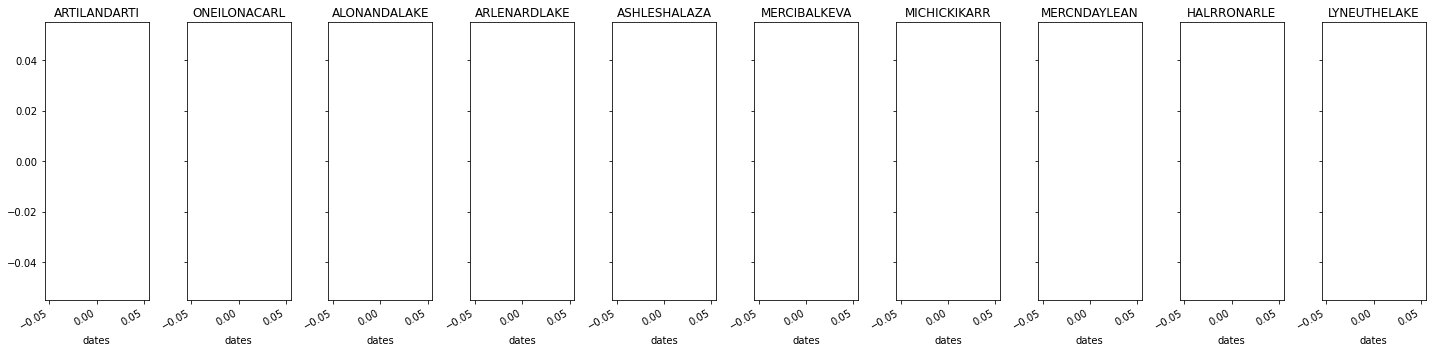

In [10183]:
cumsums(alldata)

In [10184]:
train[train['sku_name'].isin(test['sku_name'])].head(4)

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
40,YOSHTLYNYOSHZZ,486240,78001,0,0,0,0,78001,0,0,0,0,0,78001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,1,2021,K,0.000000,0,0,0,1,0,1
41,YOSHTLYNYOSHZZ,307952,497383,116495,345433,12156,0,0,8104,0,0,12156,85092,485227,1013,0,0,0,2026,8104,0,0,0,1013,44572,0,8104,0,20260,0,0,0,0,12156,149,2,2021,N,0.000000,0,0,0,1,0,0
42,YOSHTLYNYOSHZZ,179301,132703,38494,51663,4052,0,15195,22286,0,0,32416,147898,100287,9117,0,1013,0,2026,20260,0,0,0,0,50650,0,14182,0,44572,0,0,15195,0,23299,149,3,2021,N,0.000000,0,0,0,1,0,0
43,YOSHTLYNYOSHZZ,1122404,440655,269458,101300,0,0,50650,12156,1013,0,25325,193483,415330,5065,0,1013,0,5065,12156,0,2026,0,0,101300,0,13169,0,43559,0,0,13169,0,22286,149,4,2021,N,0.000000,0,0,0,1,0,0
44,YOSHTLYNYOSHZZ,876245,251224,148911,65845,0,0,0,26338,6078,0,39507,83066,211717,5065,0,3039,0,2026,25325,0,0,0,4052,25325,0,9117,0,22286,0,0,13169,0,13169,149,5,2021,N,0.314286,1,1,0,1,0,1
45,YOSHTLYNYOSHZZ,457876,423434,130677,207665,55715,3039,0,10130,12156,0,42546,172210,380888,26338,0,8104,0,0,6078,0,0,0,2026,67871,0,57741,3039,22286,0,0,7091,0,14182,149,6,2021,N,0.000000,0,1,0,1,0,0
46,YOSHTLYNYOSHZZ,230964,229951,59767,138781,15195,0,0,9117,2026,0,29377,243120,200574,8104,0,7091,0,0,8104,0,0,0,6078,127638,0,65845,3039,19247,0,4052,0,0,23299,149,7,2021,N,0.000000,0,1,0,1,0,0
47,YOSHTLYNYOSHZZ,329225,54702,43559,0,0,0,0,5065,1013,0,46598,309978,8104,20260,0,11143,0,5065,4052,2026,0,0,4052,210704,0,50650,6078,15195,0,2026,0,0,25325,149,8,2021,N,0.000000,0,0,0,1,0,1
48,YOSHTLYNYOSHZZ,114469,221847,82053,91170,16208,0,20260,6078,2026,0,60780,286679,161067,37481,0,6078,2026,6078,4052,0,0,0,5065,188418,0,55715,4052,15195,0,2026,0,0,21273,149,9,2021,N,0.233333,1,1,0,1,0,0
49,YOSHTLYNYOSHZZ,156002,163093,122573,30390,0,0,0,2026,7091,0,33429,269458,129664,17221,0,7091,0,7091,2026,0,0,0,0,151950,0,42546,3039,44572,0,0,0,0,27351,149,10,2021,N,0.000000,0,1,0,1,0,1


In [10185]:
test.year.unique()

array([2021, 2022], dtype=int64)

In [10186]:
train.groupby('year')['sellin'].sum()

year
2016    3004149761
2017    2746065725
2018    2021350330
2019    2195902386
2021    1121517625
Name: sellin, dtype: int64

In [10187]:
train.groupby('year')['sellin'].mean()

year
2016    253002.337965
2017    297161.099989
2018    242629.975993
2019    230009.676967
2021    190345.829090
Name: sellin, dtype: float64

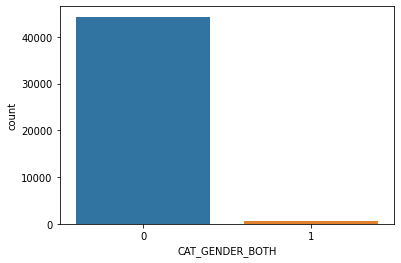

In [10188]:
sns.countplot(x='CAT_GENDER_BOTH', data = train);

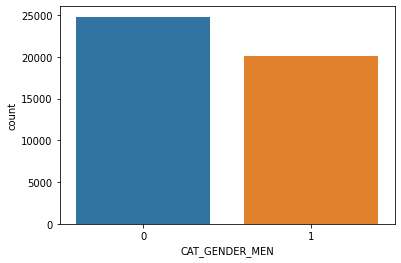

In [10189]:
sns.countplot(x='CAT_GENDER_MEN', data = train);

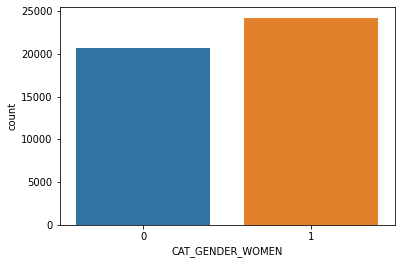

In [10190]:
sns.countplot(x='CAT_GENDER_WOMEN', data = train);

In [10191]:
# we might have to drop the cat gender both feature

In [10192]:
#time period of train 

print(f'Min date from data: {alldata.index.min().date()}')
print(f'Max date from data: {alldata.index.max().date()}')

Min date from data: 2016-01-01
Max date from data: 2022-02-01


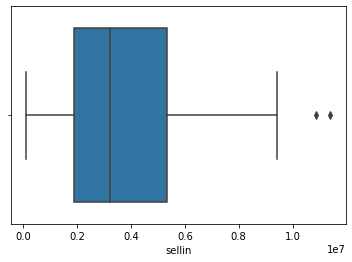

In [10193]:
sns.boxplot(x = train[train['sku_name'] =='ARTILANDARTI']['sellin'], data = train);

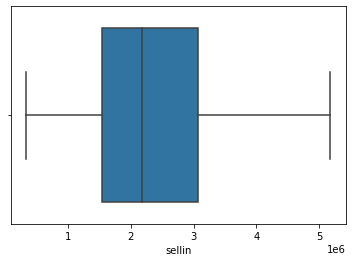

In [10194]:
sns.boxplot(x = train[train['sku_name'] =='ONEILONACARL']['sellin'], data = train);

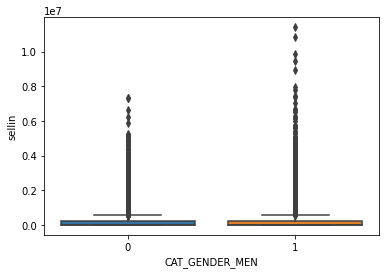

In [10196]:
sns.boxplot(x = 'CAT_GENDER_MEN', y = 'sellin', data = train);

In [10197]:
train.head()

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
0,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,7,2016,U,0.000000,0,0,0,1,0,1
1,YOSHWARDTERR,0,2026,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,0,95,2,2017,U,0.000000,0,0,0,1,0,0
2,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,5,2017,U,0.000000,0,0,0,1,0,0
3,YOSHUANEMARX,0,320108,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,0,23299,155,4,2018,W,0.270966,1,1,0,0,1,1
4,YOSHUANEMARX,0,132703,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,0,7091,0,21273,155,5,2018,W,0.063004,0,1,0,0,1,0


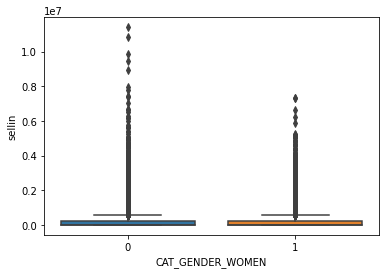

In [10198]:
sns.boxplot(x = 'CAT_GENDER_WOMEN', y = 'sellin', data = train);

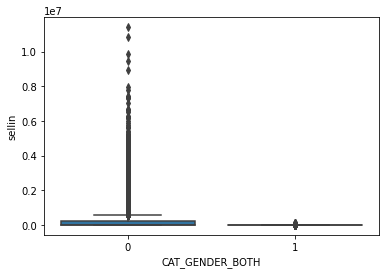

In [10199]:
sns.boxplot(x = 'CAT_GENDER_BOTH', y = 'sellin', data = train);

In [10200]:
test.head()

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN
0,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,YOSHRENECARL,11,2021,0,0,1


In [10201]:
test.shape[0]/test['sku_name'].nunique()

4.0

In [10202]:
train['sku_name'].nunique()

3868

In [10203]:
test.shape

(1528, 6)

In [10204]:
# train[train['sku_name'].isin(test['sku_name'])]['sku_name'].value_counts()

In [10205]:
test[test['sku_name'].isin(train['sku_name'])]['sku_name'].value_counts().sort_index()

ABEAHAMASHL       4
ABEENNEARMAZZ     4
ABEETTEABE        4
ABERTHAKEVAZZ     4
ABEWARDREYZZ      4
ALBEATHAPENNZZ    4
ALBELINAJULI      4
ALBERRONLYNEZZ    4
ALBERRONMAYN      4
ALONALLYKATH      4
ALONANDALAKE      4
ALONETTASHERZZ    4
ALONETTELAVEZZ    4
ALONLEENLUANZZ    4
ALONRTIEARLEZZ    4
ALONSHIADUANZZ    4
AMBEELIABRITZZ    4
AMBEIBALCOLLZZ    4
AMBENORACIND      4
ANHANHILSEZZ      4
ANHEENARUDOZZ     4
ANHMARXREENZZ     4
ANIBAHAMKARR      4
ANIBETHAJULIZZ    4
ANIBHLIEKRISZZ    4
ANIBJAYEGILDZZ    4
ANIBLIAMMAXIZZ    4
ANIBMBERJULI      4
ANIBNDISJAYEZZ    4
ANIBOLPHREVAZZ    4
ANIBREYCIND       4
ANTONOLAISAAZZ    4
ANTOREYTHOR       4
ANTOROBLEAT       4
ARLEAHAMALONZZ    4
ARLEARTWHITZZ     4
ARLEENNYARTI      4
ARLEETTAAURE      4
ARLEMONDROSEZZ    4
ARLENARDLAKE      4
ARLEOLPHWHITZZ    4
ARLEOVANROBZZ     4
ARLERTHAJAYEZZ    4
ARLEZARORHEBZZ    4
ARMAICKIAUREZZ    4
ARMASAACASHLZZ    4
ARTALLYMITCZZ     4
ARTETTAREEN       4
ARTIERINILSE      4
ARTILANDARTI      4


In [10206]:
test[~test['sku_name'].isin(train['sku_name'])]

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN
1212,CATHHALREYZZ,11,2021,0,0,1
1213,CATHHALREYZZ,12,2021,0,0,1
1214,CATHHALREYZZ,1,2022,0,0,1
1215,CATHHALREYZZ,2,2022,0,0,1


In [10207]:
train['sku_name'].unique().tolist()

['YOSHWARDTERR',
 'YOSHUANEMARX',
 'YOSHUANEBART',
 'YOSHTLYNYOSHZZ',
 'YOSHTLYNYOSH',
 'YOSHTLEYMICH',
 'YOSHRTIEROSE',
 'YOSHRTHATRAN',
 'YOSHROBKARR',
 'YOSHRICKLAZA',
 'YOSHRENECARL',
 'YOSHOVANTERR',
 'YOSHOLPHCOLL',
 'YOSHNDAYLEAT',
 'YOSHLROYARTI',
 'YOSHLONAWHITZZ',
 'YOSHLONAWHIT',
 'YOSHLONAVICT',
 'YOSHLONALILL',
 'YOSHLIZAARVI',
 'YOSHLIZAARMA',
 'YOSHLIAMROSE',
 'YOSHLEENILSEZZ',
 'YOSHLEENILSE',
 'YOSHLEENBART',
 'YOSHLEENARMA',
 'YOSHLANDONEI',
 'YOSHLANDJULIZZ',
 'YOSHLANDJULI',
 'YOSHILSEHOWAZZ',
 'YOSHILSEHOWA',
 'YOSHHORALYNE',
 'YOSHHEBAAMBE',
 'YOSHHANGILSE',
 'YOSHHANGARVI',
 'YOSHHAELVICT',
 'YOSHERRYISAA',
 'YOSHENNYAURE',
 'YOSHENNEJULI',
 'YOSHELLYCATH',
 'YOSHELIACORE',
 'YOSHATHAKEVA',
 'YOSHANNABART',
 'WHITZAROSIGR',
 'WHITVETASHER',
 'WHITTLEYSIGR',
 'WHITSHIAALBEZZ',
 'WHITSHIAALBE',
 'WHITSAACREY',
 'WHITRRIEABE',
 'WHITRISACIND',
 'WHITRICKRICK',
 'WHITRENEMICH',
 'WHITRENECOLL',
 'WHITRENECAND',
 'WHITRANGELIZ',
 'WHITRANGANH',
 'WHITOLPHKAITZZ',
 'WH

In [10208]:
# train['sku_name'] = train['sku_name'].replace('CATHHALREY','CATHHALREYZZ')

In [10209]:
# I expect an average performance for the product above because we don't have data from 2018

# maybe the product is one of those products that is occasionally purchased

In [10210]:
train['sellin'].median()

22286.0

In [10211]:
train['sellin'].mean()

247053.26561211987

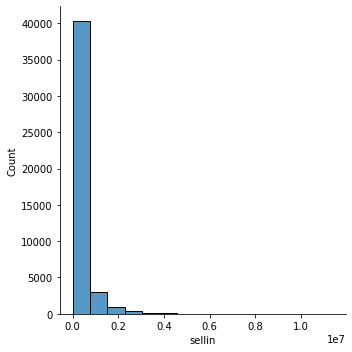

In [10212]:
sns.displot(x='sellin', data = train, bins = 15);

In [10213]:
train.duplicated().sum()

12

In [10214]:
train.drop_duplicates(inplace = True)

In [10215]:
train = train.groupby(['sku_name','year','month']).mean().reset_index()

In [10216]:
train = train[['sku_name','year','month','sellin','CAT_GENDER_BOTH','CAT_GENDER_MEN','CAT_GENDER_WOMEN','starting_inventory','sellout','onhand_inventory']]

In [10217]:
train['sellin'] = np.log1p(train['sellin'])

In [10218]:
train.head()

,sku_name,year,month,sellin,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,starting_inventory,sellout,onhand_inventory
0,ABEAHAMASHL,2016,1,13.713017,0.0,0.0,1.0,6844841.0,421408.0,4081377.0
1,ABEAHAMASHL,2016,2,12.789971,0.0,0.0,1.0,6679722.0,468006.0,3970960.0
2,ABEAHAMASHL,2016,3,13.978570,0.0,0.0,1.0,6462940.0,473071.0,3553604.0
3,ABEAHAMASHL,2016,4,13.783430,0.0,0.0,1.0,5217963.0,448759.0,3381394.0
4,ABEAHAMASHL,2016,5,13.060558,0.0,0.0,1.0,4785412.0,552085.0,3310484.0


In [10219]:
train.duplicated().any()

False

In [10220]:
train['day'] = 1
test['day'] = 1

In [10221]:
train['dates'] = pd.to_datetime(train[['year','month','day']])
train.drop('day', axis = 1, inplace = True)

test['dates'] = pd.to_datetime(test[['year','month','day']])
test.drop('day', axis = 1, inplace = True)

In [10222]:
# train.set_index('dates', inplace = True)
train.sort_values(['sku_name','dates'], inplace = True)

In [10223]:
train.shape

(43212, 11)

In [10224]:
train.head(10)

,sku_name,year,month,sellin,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,starting_inventory,sellout,onhand_inventory,dates
0,ABEAHAMASHL,2016,1,13.713017,0.0,0.0,1.0,6844841.0,421408.0,4081377.0,2016-01-01
1,ABEAHAMASHL,2016,2,12.789971,0.0,0.0,1.0,6679722.0,468006.0,3970960.0,2016-02-01
2,ABEAHAMASHL,2016,3,13.978570,0.0,0.0,1.0,6462940.0,473071.0,3553604.0,2016-03-01
3,ABEAHAMASHL,2016,4,13.783430,0.0,0.0,1.0,5217963.0,448759.0,3381394.0,2016-04-01
4,ABEAHAMASHL,2016,5,13.060558,0.0,0.0,1.0,4785412.0,552085.0,3310484.0,2016-05-01
5,ABEAHAMASHL,2016,6,12.899560,0.0,0.0,1.0,4423771.0,529799.0,2860712.0,2016-06-01
6,ABEAHAMASHL,2016,7,13.386818,0.0,0.0,1.0,3172716.0,449772.0,2642917.0,2016-07-01
7,ABEAHAMASHL,2016,8,12.519097,0.0,0.0,1.0,2882998.0,415330.0,2681411.0,2016-08-01
8,ABEAHAMASHL,2016,9,13.559241,0.0,0.0,1.0,2122235.0,479149.0,2458551.0,2016-09-01
9,ABEAHAMASHL,2016,10,13.423463,0.0,0.0,1.0,2693567.0,362654.0,2520344.0,2016-10-01


In [10225]:
alldata = pd.concat([train,test])

In [10226]:
alldata.set_index('dates', inplace = True)

In [10227]:
# alldata['quarter'] = alldata.index.quarter

In [10228]:
alldata.sort_values(['sku_name','dates'], inplace = True)

In [10229]:
alldata.head()

,sku_name,year,month,sellin,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,starting_inventory,sellout,onhand_inventory
dates,,,,,,,,,,
2016-01-01,ABEAHAMASHL,2016,1,13.713017,0.0,0.0,1.0,6844841.0,421408.0,4081377.0
2016-02-01,ABEAHAMASHL,2016,2,12.789971,0.0,0.0,1.0,6679722.0,468006.0,3970960.0
2016-03-01,ABEAHAMASHL,2016,3,13.978570,0.0,0.0,1.0,6462940.0,473071.0,3553604.0
2016-04-01,ABEAHAMASHL,2016,4,13.783430,0.0,0.0,1.0,5217963.0,448759.0,3381394.0
2016-05-01,ABEAHAMASHL,2016,5,13.060558,0.0,0.0,1.0,4785412.0,552085.0,3310484.0


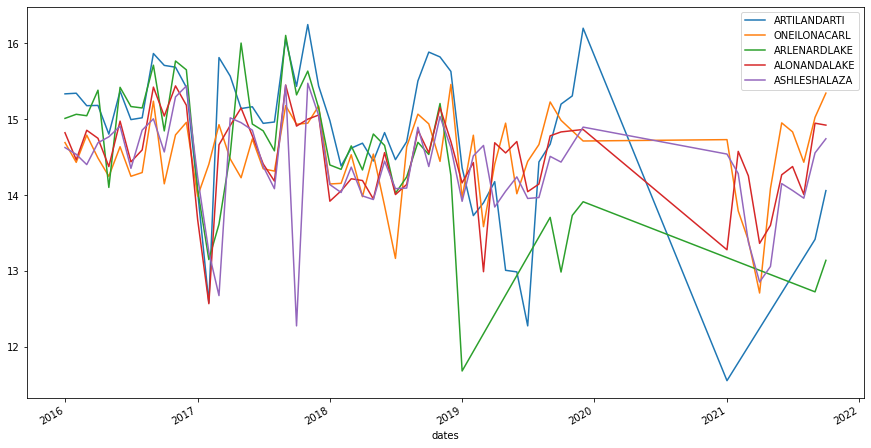

In [10230]:
plt.figure(figsize = (15,8))
alldata[alldata['sku_name'] == 'ARTILANDARTI']['sellin'].plot()
alldata[alldata['sku_name'] == 'ONEILONACARL']['sellin'].plot()
alldata[alldata['sku_name'] == 'ARLENARDLAKE']['sellin'].plot()
alldata[alldata['sku_name'] == 'ALONANDALAKE']['sellin'].plot()
alldata[alldata['sku_name'] == 'ASHLESHALAZA']['sellin'].plot()
plt.legend(['ARTILANDARTI','ONEILONACARL','ARLENARDLAKE','ALONANDALAKE','ASHLESHALAZA'])
plt.show()

In [10231]:
# alldata['price'] = alldata.groupby('sku_name')['price'].fillna(method = 'ffill')

In [10232]:
alldata.isna().sum()

sku_name                 0
year                     0
month                    0
sellin                1528
CAT_GENDER_BOTH          0
CAT_GENDER_MEN           0
CAT_GENDER_WOMEN         0
starting_inventory    1528
sellout               1528
onhand_inventory      1528
dtype: int64

In [10233]:
train.head()

,sku_name,year,month,sellin,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,starting_inventory,sellout,onhand_inventory,dates
0,ABEAHAMASHL,2016,1,13.713017,0.0,0.0,1.0,6844841.0,421408.0,4081377.0,2016-01-01
1,ABEAHAMASHL,2016,2,12.789971,0.0,0.0,1.0,6679722.0,468006.0,3970960.0,2016-02-01
2,ABEAHAMASHL,2016,3,13.978570,0.0,0.0,1.0,6462940.0,473071.0,3553604.0,2016-03-01
3,ABEAHAMASHL,2016,4,13.783430,0.0,0.0,1.0,5217963.0,448759.0,3381394.0,2016-04-01
4,ABEAHAMASHL,2016,5,13.060558,0.0,0.0,1.0,4785412.0,552085.0,3310484.0,2016-05-01


In [10234]:
alldata['onhand_inventory'] = alldata['onhand_inventory'].shift()
alldata['sellout'] = alldata['sellout'].shift()
alldata['starting_inventory'] = alldata['starting_inventory'].shift()



In [10235]:
# the feature name will be created dynamically with regards to the lag value for a given list of lags

def lag_features(dataframe, lags):
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['sales_lag_' + str(lag)] = dataframe.groupby(["sku_name"])['sellin'].transform(lambda x: x.shift(lag))        
    return dataframe

In [10236]:
alldata = lag_features(alldata, [1,2, 4,8,12])
# alldata = lag_features(alldata, [1,2])

In [10237]:

def lag_channels(dataframe, lags):
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['lag_channel' + str(lag)] = dataframe.groupby(["sku_name"])['sellin','sellin_channel_1','sellin_channel_2','sellin_channel_3','sellin_channel_4','sellin_channel_5','sellin_channel_6','sellin_channel_7','sellin_channel_8'].transform(lambda x: x.shift(lag))        
    return dataframe



In [10238]:
def lead_features(dataframe, leads):
    dataframe = dataframe.copy()
    for lead in leads:
        dataframe['sales_lead_' + str(np.abs(lead))] = dataframe.groupby(["sku_name"])['sellin'].transform(lambda x: x.shift(lead))         
    return dataframe

In [10239]:
alldata = lead_features(alldata, [-1, -2, -3])

In [10240]:
alldata.shape

(44740, 18)

In [10241]:
def roll_mean_features(dataframe, windows):
    dataframe = dataframe.copy()
    for window in windows:
        dataframe['sales_roll_mean_' + str(window)] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).mean())       
    return dataframe

In [10242]:
alldata = roll_mean_features(alldata, [4,8])

# alldata = roll_mean_features(alldata, [2])

In [10243]:
def lag_roll_mean(dataframe, lags):
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['rolling_mean_lag_' + str(lag)] = dataframe.groupby(["sku_name"])['sales_roll_mean_4'].transform(lambda x: x.shift(lag))        
    return dataframe

In [10244]:
alldata = lag_roll_mean(alldata, [2])

#remember to uncomment

In [10245]:
# alldata['percent_change1'] = alldata.groupby('sku_name')['sellin'].shift(1).pct_change(periods = 1)

In [10246]:
def roll_median_features(dataframe, windows):
    dataframe = dataframe.copy()
    for window in windows:
        dataframe['sales_roll_median_' + str(window)] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).median())  
    return dataframe

In [10247]:
# alldata = roll_median_features(alldata, [2])

In [10248]:
def lag_roll_median(dataframe, lags):
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['rolling_median_lag_' + str(lag)] = dataframe.groupby(["sku_name"])['sales_roll_median_3'].transform(lambda x: x.shift(lag))        
    return dataframe

In [10249]:
# alldata = lag_roll_median(alldata, [1])

In [10250]:
def roll_std_features(dataframe, windows):
    dataframe = dataframe.copy()
    for window in windows:
        dataframe['sales_roll_std_' + str(window)] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).rolling(window=window).std())    
    return dataframe

In [10251]:
# alldata = roll_std_features(alldata, [3,6])

In [10252]:
def lag_roll_std(dataframe, lags):
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['rolling_std_lag_' + str(lag)] = dataframe.groupby(["sku_name"])['sales_roll_std_3'].transform(lambda x: x.shift(lag))        
    return dataframe

In [10253]:
# alldata = lag_roll_std(alldata, [1])

In [10254]:
def roll_min_features(dataframe, windows):
    dataframe = dataframe.copy()
    for window in windows:
        dataframe['sales_roll_min_' + str(window)] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).min())
    return dataframe

In [10255]:
alldata = roll_min_features(alldata, [3])

In [10256]:
def lag_roll_min(dataframe, lags):
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['rolling_min_lag_' + str(lag)] = dataframe.groupby(["sku_name"])['sales_roll_min_3'].transform(lambda x: x.shift(lag))        
    return dataframe

In [10257]:
# alldata = lag_roll_min(alldata, [1])

In [10258]:
def roll_max_features(dataframe, windows):
    dataframe = dataframe.copy()
    for window in windows:
        dataframe['sales_roll_max_' + str(window)] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).max())
    return dataframe

In [10259]:
alldata = roll_max_features(alldata, [3])

In [10260]:
def lag_roll_max(dataframe, lags):
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['rolling_max_lag_' + str(lag)] = dataframe.groupby(["sku_name"])['sales_roll_max_3'].transform(lambda x: x.shift(lag))        
    return dataframe

In [10261]:
# alldata = lag_roll_max(alldata, [1])

In [10262]:
alldata.head()

,sku_name,year,month,sellin,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3
dates,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,ABEAHAMASHL,2016,1,13.713017,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.789971,13.978570,13.783430,NaN,NaN,NaN,NaN,NaN
2016-02-01,ABEAHAMASHL,2016,2,12.789971,0.0,0.0,1.0,6844841.0,421408.0,4081377.0,13.713017,NaN,NaN,NaN,NaN,13.978570,13.783430,13.060558,13.713017,13.713017,NaN,13.713017,13.713017
2016-03-01,ABEAHAMASHL,2016,3,13.978570,0.0,0.0,1.0,6679722.0,468006.0,3970960.0,12.789971,13.713017,NaN,NaN,NaN,13.783430,13.060558,12.899560,13.251494,13.251494,NaN,12.789971,13.713017
2016-04-01,ABEAHAMASHL,2016,4,13.783430,0.0,0.0,1.0,6462940.0,473071.0,3553604.0,13.978570,12.789971,NaN,NaN,NaN,13.060558,12.899560,13.386818,13.493853,13.493853,13.713017,12.789971,13.978570
2016-05-01,ABEAHAMASHL,2016,5,13.060558,0.0,0.0,1.0,5217963.0,448759.0,3381394.0,13.783430,13.978570,13.713017,NaN,NaN,12.899560,13.386818,12.519097,13.566247,13.566247,13.251494,12.789971,13.978570


In [10263]:
def ewm_features(dataframe, alphas, lags):
    dataframe = dataframe.copy()
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["sku_name"])['sellin']. \
                    transform(lambda x: x.shift(lag).ewm(alpha=alpha,adjust = False).mean())
    return dataframe

In [10264]:
alphas = [0.98, 0.7, 0.2]
lags = [1,3]

In [10265]:
alldata = ewm_features(alldata, alphas, lags)

In [10266]:
def exp_max(dataframe):
    dataframe = dataframe.copy()
    dataframe['sales_expanding_max_'] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).expanding().max())
    return dataframe

In [10267]:
# alldata = exp_max(alldata)

In [10268]:
def exp_min(dataframe):
    dataframe = dataframe.copy()
    dataframe['sales_expanding_min_'] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).expanding().min())
    return dataframe

In [10269]:
# alldata = exp_min(alldata)

In [10270]:
def exp_mean(dataframe):
    dataframe = dataframe.copy()
    dataframe['sales_expanding_mean_'] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).expanding().mean())
    return dataframe

In [10271]:
alldata = exp_mean(alldata)

In [10272]:
def exp_median(dataframe):
    dataframe = dataframe.copy()
    dataframe['sales_expanding_median_'] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).expanding().median())
    return dataframe

In [10273]:
# alldata = exp_median(alldata)

In [10274]:
def exp_sum(dataframe):
    dataframe = dataframe.copy()
    dataframe['sales_expanding_sum_'] = dataframe.groupby(["sku_name"])['sellin']. \
                                                          transform(lambda x: x.shift(1).expanding().sum())
    return dataframe

In [10275]:
# alldata = exp_sum(alldata)

In [10276]:
# alldata['costly_female_products'] = np.where((alldata['price']>300) & (alldata['CAT_GENDER_WOMEN']==1), 1, 0)
# alldata['high_volume_female_products'] = np.where((alldata['price']<=300) & (alldata['CAT_GENDER_WOMEN']==1), 1, 0)

In [10277]:
# alldata['costly_male_products'] = np.where((alldata['price']>370) & (alldata['CAT_GENDER_MEN']==1), 1, 0)
# alldata['high_volume_male_products'] = np.where((alldata['price']<=370) & (alldata['CAT_GENDER_MEN']==1), 1, 0)

In [10278]:
# # alldata['prev expanding max'] = alldata.groupby('sku_name')['sales_expanding_max_'].shift(1)
# # alldata['prev expanding min'] = alldata.groupby('sku_name')['sales_expanding_min_'].shift(1)
# alldata['prev expanding mean'] = alldata.groupby('sku_name')['sales_expanding_mean_'].shift(1)
# alldata['prev expanding median'] = alldata.groupby('sku_name')['sales_expanding_median_'].shift(1)
# # alldata['prev expanding sum'] = alldata.groupby('sku_name')['sales_expanding_sum_'].shift(1)

In [10279]:
def get_season(x):
    """To get season"""
    if x in [12,1,2]:
        return 0  #winter
    elif x in [3,4,5]:
        return 1 #spring
    elif x in [6,7,8]:
        return 2 # summer
    else:
        return 3 #Autumn

In [10280]:
# alldata['season'] = alldata['month'].apply(lambda x : get_season(x))

In [10281]:
def get_year_end(x):
    """To get end of the year"""
    if x in [11,12,]:
        return 1  
    else:
        return 0 

In [10282]:
# alldata['EOY'] = alldata['month'].apply(lambda x : get_year_end(x))

In [10283]:
alldata['weighting'] = 0.6*alldata['sales_lag_1'] + 0.4*alldata['sales_lag_2'] 

In [10284]:
train.groupby('sku_name')['sellin'].mean().sort_values(ascending = False).head(10)

sku_name
ARTILANDARTI    14.796218
ARLENARDLAKE    14.566296
ONEILONACARL    14.503247
ALONANDALAKE    14.479074
ASHLESHALAZA    14.347923
MERCIBALKEVA    14.345126
MICHICKIKARR    14.275490
MERCNDAYLEAN    14.202121
LYNEUTHELAKE    14.111937
MITCKEVAALBE    14.056716
Name: sellin, dtype: float64

In [10285]:
# train['sellin'] = np.log(train['sellin'])

In [10286]:
# alldata = pd.get_dummies(alldata, columns = ['grouping_shift'])

In [10287]:
from sklearn.preprocessing import LabelEncoder

In [10288]:
alldata = alldata.sort_values('sellin', ascending = False)

In [10289]:
le = LabelEncoder()
alldata['sku_name'] = le.fit_transform(alldata['sku_name'])

In [10290]:
alldata = alldata.sort_values(['sku_name','dates'])
alldata.head()

,sku_name,year,month,sellin,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3,sales_ewm_alpha_098_lag_1,sales_ewm_alpha_098_lag_3,sales_ewm_alpha_07_lag_1,sales_ewm_alpha_07_lag_3,sales_ewm_alpha_02_lag_1,sales_ewm_alpha_02_lag_3,sales_expanding_mean_,weighting
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0,2016,1,13.713017,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.789971,13.978570,13.783430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,0,2016,2,12.789971,0.0,0.0,1.0,6844841.0,421408.0,4081377.0,13.713017,NaN,NaN,NaN,NaN,13.978570,13.783430,13.060558,13.713017,13.713017,NaN,13.713017,13.713017,13.713017,NaN,13.713017,NaN,13.713017,NaN,13.713017,NaN
2016-03-01,0,2016,3,13.978570,0.0,0.0,1.0,6679722.0,468006.0,3970960.0,12.789971,13.713017,NaN,NaN,NaN,13.783430,13.060558,12.899560,13.251494,13.251494,NaN,12.789971,13.713017,12.808432,NaN,13.066885,NaN,13.528408,NaN,13.251494,13.159190
2016-04-01,0,2016,4,13.783430,0.0,0.0,1.0,6462940.0,473071.0,3553604.0,13.978570,12.789971,NaN,NaN,NaN,13.060558,12.899560,13.386818,13.493853,13.493853,13.713017,12.789971,13.978570,13.955168,13.713017,13.705065,13.713017,13.618440,13.713017,13.493853,13.503131
2016-05-01,0,2016,5,13.060558,0.0,0.0,1.0,5217963.0,448759.0,3381394.0,13.783430,13.978570,13.713017,NaN,NaN,12.899560,13.386818,12.519097,13.566247,13.566247,13.251494,12.789971,13.978570,13.786865,12.808432,13.759921,13.066885,13.651438,13.528408,13.566247,13.861486


In [10291]:
alldata = alldata.drop(['CAT_GENDER_BOTH','CAT_GENDER_WOMEN','CAT_GENDER_MEN','year'], axis = 1)

In [10292]:
train = alldata.loc[~alldata.sellin.isna()]
test = alldata.loc[alldata.sellin.isna()]

In [10293]:
train.head()

,sku_name,month,sellin,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3,sales_ewm_alpha_098_lag_1,sales_ewm_alpha_098_lag_3,sales_ewm_alpha_07_lag_1,sales_ewm_alpha_07_lag_3,sales_ewm_alpha_02_lag_1,sales_ewm_alpha_02_lag_3,sales_expanding_mean_,weighting
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0,1,13.713017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.789971,13.978570,13.783430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,0,2,12.789971,6844841.0,421408.0,4081377.0,13.713017,NaN,NaN,NaN,NaN,13.978570,13.783430,13.060558,13.713017,13.713017,NaN,13.713017,13.713017,13.713017,NaN,13.713017,NaN,13.713017,NaN,13.713017,NaN
2016-03-01,0,3,13.978570,6679722.0,468006.0,3970960.0,12.789971,13.713017,NaN,NaN,NaN,13.783430,13.060558,12.899560,13.251494,13.251494,NaN,12.789971,13.713017,12.808432,NaN,13.066885,NaN,13.528408,NaN,13.251494,13.159190
2016-04-01,0,4,13.783430,6462940.0,473071.0,3553604.0,13.978570,12.789971,NaN,NaN,NaN,13.060558,12.899560,13.386818,13.493853,13.493853,13.713017,12.789971,13.978570,13.955168,13.713017,13.705065,13.713017,13.618440,13.713017,13.493853,13.503131
2016-05-01,0,5,13.060558,5217963.0,448759.0,3381394.0,13.783430,13.978570,13.713017,NaN,NaN,12.899560,13.386818,12.519097,13.566247,13.566247,13.251494,12.789971,13.978570,13.786865,12.808432,13.759921,13.066885,13.651438,13.528408,13.566247,13.861486


In [10294]:
train = train.dropna(subset = ['sellin','sales_lead_1','sales_lead_2','sales_lead_3'])

In [10295]:
train = train.dropna(subset = ['sales_lag_2'])

In [10296]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

In [10297]:
def splitting(train):

    train1 = train.groupby('sku_name').filter(lambda x : x.sku_name.value_counts() <= 3)
    train2 = train[~train['sku_name'].isin(train1['sku_name'])]
    
    skus = train2.groupby('sku_name')
    trainset = []
    valset = []
    
    for sku in skus.groups:
        group = skus.get_group(sku)
        trainset.append(group[:int(0.90 * len(group))])
        valset.append(group[int(0.90 * len(group)): ])
        
    trainset.append(train1)
    trainset = pd.concat(trainset)
    valset = pd.concat(valset)
    
    print('train shape: ', train.shape[0])
    print('trainingset shape: ', trainset.shape[0]+ valset.shape[0])
    
    print('train shape: ', trainset.shape[0])
    print('val shape: ', valset.shape[0])
    
    
    #print('trainset null: ', trainset.isna().sum())
    #print('valset null: ', testset.isna().sum())
    return trainset,valset
    

In [10298]:
trainset, valset = splitting(train)

train shape:  28059
trainingset shape:  28059
train shape:  24557
val shape:  3502


In [10299]:
# plt.figure(figsize = (10,10))
# a = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August',  'September' , 'October',  'November', 'December']
# trainset.groupby('month')['sellin'].sum().plot(kind = 'pie' , autopct = '%1.0f%%', fontsize = 15);

In [10300]:
# plt.figure(figsize = (10,10))
# a = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August',  'September' , 'October',  'November', 'December']
# traindata.groupby(['month'])['sellin'].sum().plot(kind = 'pie' , autopct = '%1.0f%%', fontsize = 15);

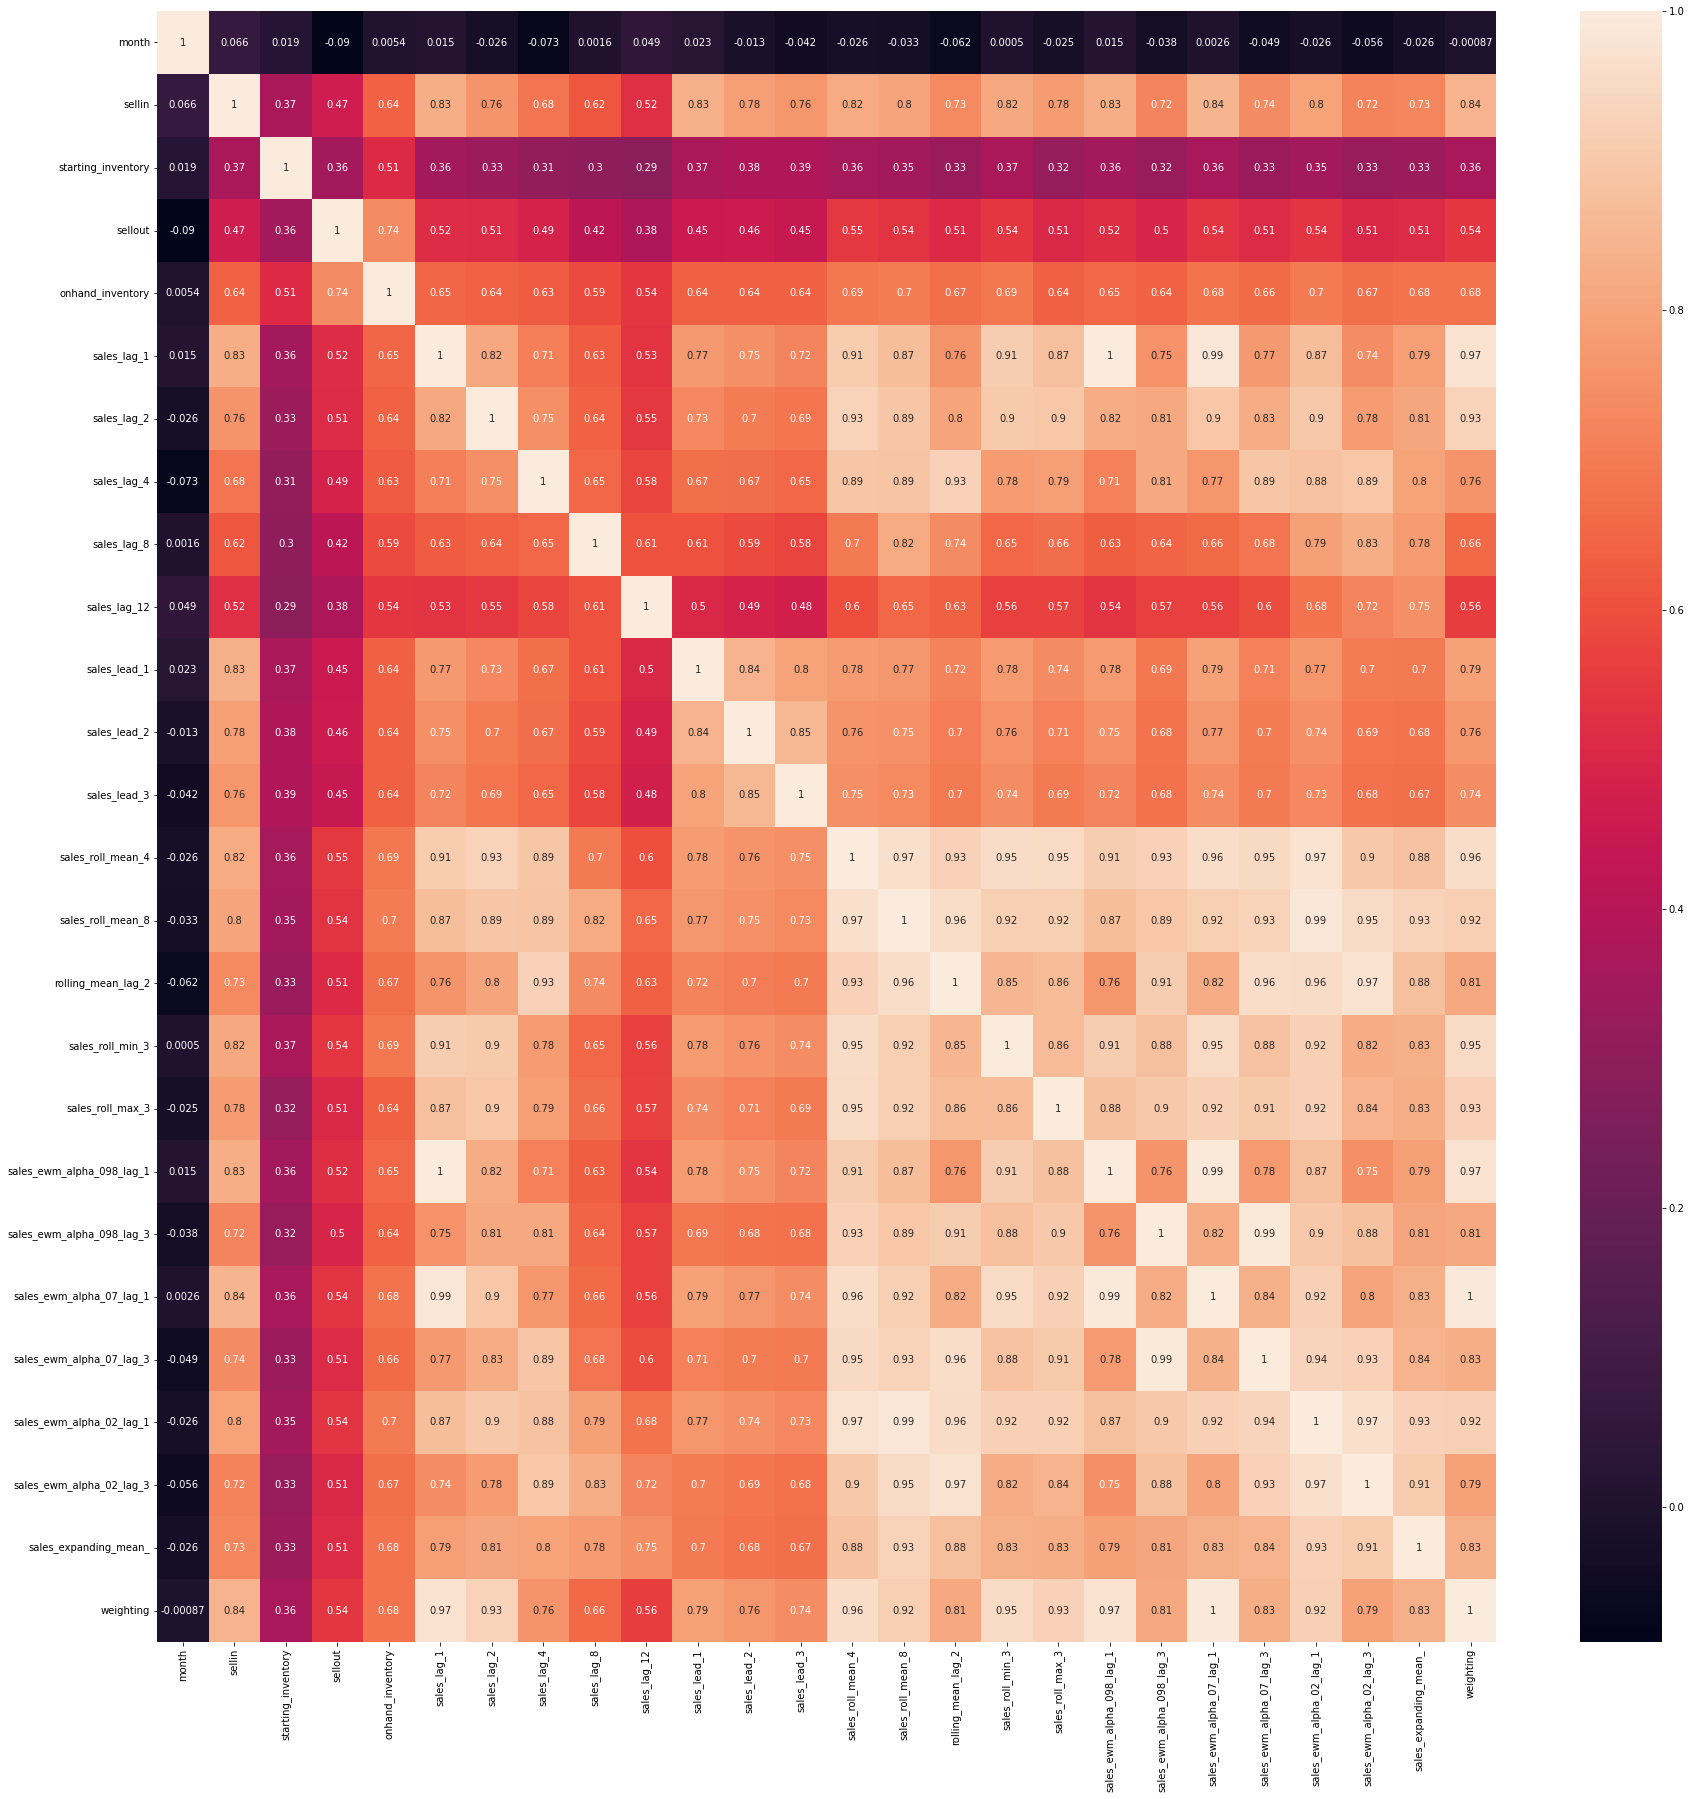

In [10301]:
plt.figure(figsize = (30,30))
sns.heatmap(train.drop('sku_name', axis = 1).corr(), annot = True);

In [10302]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

In [10303]:
# si = SimpleImputer()

In [10304]:
# x_train = si.fit_transform(x_train)

In [10305]:
scale_x = MinMaxScaler()

In [10306]:
trainset = trainset.sort_values(['sku_name','dates'])
trainset.head()

,sku_name,month,sellin,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3,sales_ewm_alpha_098_lag_1,sales_ewm_alpha_098_lag_3,sales_ewm_alpha_07_lag_1,sales_ewm_alpha_07_lag_3,sales_ewm_alpha_02_lag_1,sales_ewm_alpha_02_lag_3,sales_expanding_mean_,weighting
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-01,0,3,13.978570,6679722.0,468006.0,3970960.0,12.789971,13.713017,NaN,NaN,NaN,13.783430,13.060558,12.899560,13.251494,13.251494,NaN,12.789971,13.713017,12.808432,NaN,13.066885,NaN,13.528408,NaN,13.251494,13.159190
2016-04-01,0,4,13.783430,6462940.0,473071.0,3553604.0,13.978570,12.789971,NaN,NaN,NaN,13.060558,12.899560,13.386818,13.493853,13.493853,13.713017,12.789971,13.978570,13.955168,13.713017,13.705065,13.713017,13.618440,13.713017,13.493853,13.503131
2016-05-01,0,5,13.060558,5217963.0,448759.0,3381394.0,13.783430,13.978570,13.713017,NaN,NaN,12.899560,13.386818,12.519097,13.566247,13.566247,13.251494,12.789971,13.978570,13.786865,12.808432,13.759921,13.066885,13.651438,13.528408,13.566247,13.861486
2016-06-01,0,6,12.899560,4785412.0,552085.0,3310484.0,13.060558,13.783430,12.789971,NaN,NaN,13.386818,12.519097,13.559241,13.403133,13.465109,13.493853,13.060558,13.978570,13.075084,13.955168,13.270367,13.705065,13.533262,13.618440,13.465109,13.349707
2016-07-01,0,7,13.386818,4423771.0,529799.0,2860712.0,12.899560,13.060558,13.978570,NaN,NaN,12.519097,13.559241,13.423463,13.430530,13.370851,13.566247,12.899560,13.783430,12.903070,13.786865,13.010802,13.759921,13.406522,13.651438,13.370851,12.963959


In [10307]:
trainset.isna().sum()

sku_name                         0
month                            0
sellin                           0
starting_inventory               0
sellout                          0
onhand_inventory                 0
sales_lag_1                      0
sales_lag_2                      0
sales_lag_4                   4323
sales_lag_8                  10366
sales_lag_12                 14318
sales_lead_1                     0
sales_lead_2                     0
sales_lead_3                     0
sales_roll_mean_4                0
sales_roll_mean_8                0
rolling_mean_lag_2            2261
sales_roll_min_3                 0
sales_roll_max_3                 0
sales_ewm_alpha_098_lag_1        0
sales_ewm_alpha_098_lag_3     2261
sales_ewm_alpha_07_lag_1         0
sales_ewm_alpha_07_lag_3      2261
sales_ewm_alpha_02_lag_1         0
sales_ewm_alpha_02_lag_3      2261
sales_expanding_mean_            0
weighting                        0
dtype: int64

In [10308]:
x_train = trainset.drop(['sellin','sales_lead_1','sales_lead_2','sales_lead_3'], axis = 1)
y_train = trainset[['sellin','sales_lead_1','sales_lead_2','sales_lead_3']]

In [10309]:
x_train = scale_x.fit_transform(x_train)

In [10310]:
x_val = valset.drop(['sellin','sales_lead_1','sales_lead_2','sales_lead_3'], axis = 1)
y_val = valset[['sellin','sales_lead_1','sales_lead_2','sales_lead_3']]

In [10311]:
x_val = scale_x.transform(x_val)

In [10312]:
model_results = pd.DataFrame(columns=["Model", "mse" ,"mae"])

In [10313]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import Ridge

In [10314]:
xg = XGBRegressor(random_state=101,learning_rate = 0.1)
hist = HistGradientBoostingRegressor(loss = 'absolute_error', learning_rate = 0.1,random_state=42)
cbr = CatBoostRegressor(learning_rate = 0.1, verbose = 0, random_state = 42)
lg = LGBMRegressor(random_state=101,learning_rate = 0.1, loss = 'mean_absolute_error')
svl = SVR(kernel = 'linear')
ridge = Ridge(random_state = 42)
svf = SVR(kernel = 'rbf')

In [10315]:
# stackreg = StackingRegressor(regressors = ['xg','hist','cbr','lg','svl','svf'], meta_regressor = ridge)

In [10316]:
models = [
#      ('ETR' , ExtraTreeRegressor()),
#           ("Decision Tree", DecisionTreeRegressor(random_state=101, max_depth =3)),
#     ("Linear Regression", MultiOutputRegressor(LinearRegression())), 
#      ('svr' , MultiOutputRegressor(SVR())),
#       ('mlp', MLPRegressor(random_state = 42,activation='relu', alpha=0.0001, hidden_layer_sizes=(32,8),max_iter = 500, early_stopping = True)),
#           ("Random Forest", RandomForestRegressor(random_state=101)),
# #           ("LightGBM", LGBMRegressor(random_state=101,learning_rate = 0.02, loss = 'mean_absolute_error')),
#     ('stacking' , MultiOutputRegressor(StackingRegressor(regressors = [xg,hist,cbr,lg,svl,svf], meta_regressor = ridge))),
             ("XGBoost", XGBRegressor(random_state=101,learning_rate = 0.1)), 
    
# #         ('hist', HistGradientBoostingRegressor(loss = 'absolute_error', random_state=42)),
#     ("KNN", KNeighborsRegressor(n_neighbors = 20)),
       ("Multi LGBM", MultiOutputRegressor(LGBMRegressor(random_state=101,learning_rate = 0.1, loss = 'mean_absolute_error'))),
#   ('Catboost' , CatBoostRegressor(learning_rate = 0.1, loss_function = 'MultiRMSE', verbose = 0, random_state = 42)),
 ('Multi', MultiOutputRegressor(HistGradientBoostingRegressor(loss = 'absolute_error', learning_rate = 0.1,random_state=42)))]
#         ("CatBoost", CatBoostRegressor(random_state=101,learning_rate = 0.1, verbose = 0,loss_function= 'MAE'))]
#           ("KNN", KNeighborsRegressor())]
#           ("Gradient Boosting", GradientBoostingRegressor(random_state = 101, learning_rate = 0.1))]

In [10317]:
# pip install mlxtend

In [10318]:
for model_name, model in models:
    model.fit(x_train, y_train)
    predictions = np.expm1(model.predict(x_val))
    #r2_val = r2_score(y_val,predictions)
    mse = mean_squared_error(np.exp(y_val),predictions)
    mae = mean_absolute_error(np.exp(y_val),predictions)
    
    new_row = {"Model": model_name, "mae" : mae,"mse" : mse}
    model_results = model_results.append(new_row, ignore_index=True)


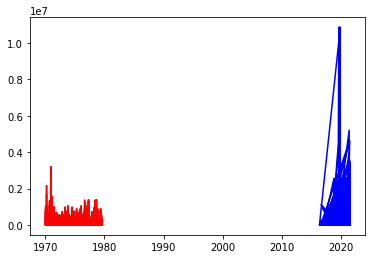

In [10319]:

plt.plot(np.expm1(y_val), color = 'blue')
plt.plot(predictions, color = 'red')


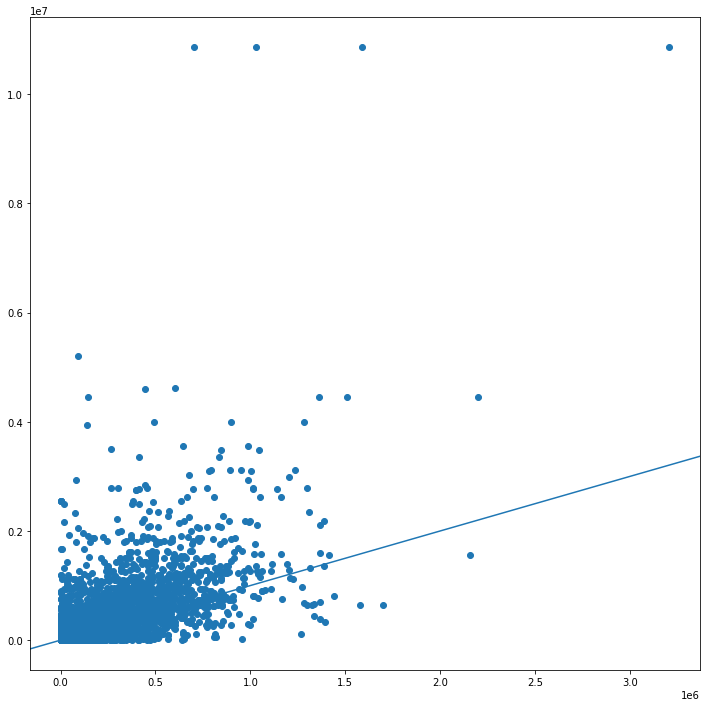

In [10320]:
plt.figure(figsize = (12,12))
plt.scatter(predictions, np.exp(y_val))
# plt.scatter(np.expm1(y_pred_val), np.expm1(y_val))
plt.axline([0,0],[1,1]);


# plt.figure(figsize = (12,12))
# plt.scatter(predictions, y_val)
# # # plt.scatter(np.expm1(y_pred_val), np.expm1(y_val))
# # plt.axline([0,0],[1,1]);


In [10321]:
np.exp(y_val).head(10)

,sellin,sales_lead_1,sales_lead_2,sales_lead_3
dates,,,,
2021-02-01,12157.0,42547.0,7092.0,24313.0
2021-03-01,42547.0,7092.0,24313.0,156003.0
2021-04-01,7092.0,24313.0,156003.0,34443.0
2021-05-01,24313.0,156003.0,34443.0,38495.0
2021-06-01,156003.0,34443.0,38495.0,29378.0
2021-07-01,34443.0,38495.0,29378.0,18235.0
2018-09-01,13170.0,1014.0,1014.0,1014.0
2018-10-01,1014.0,1014.0,1014.0,1014.0
2017-06-01,1014.0,6079.0,6079.0,5066.0


In [10322]:
predictions[:10]

array([[ 36463.54189475,  68125.85073347,  47547.70079132,
         88452.33518416],
       [ 40931.9055402 ,  45515.55872327,  43871.29933119,
         98841.84785209],
       [ 56484.73757223,  68859.43800446,  88018.81893854,
         94196.1602764 ],
       [ 10262.55779524,  23962.58855337,  24856.53402256,
         56271.74385058],
       [ 77434.04833583,  95218.51278847,  55168.58709158,
         74710.29679374],
       [106537.42063473, 131607.87862011, 111486.68854004,
         82038.73456722],
       [ 53633.90235229,  32616.82809578,  21436.22919963,
         13435.6101344 ],
       [ 11661.31535789,  10345.46822436,   8165.94942716,
          3733.87369202],
       [  6504.69151453,   4264.93334995,   5095.64246458,
          3253.92439864],
       [  1876.75985354,   2187.49425273,   2021.86345612,
          1432.4439876 ]])

In [10323]:
model_results.sort_values(by="mae", ascending=False)

,Model,mse,mae
1,Multi LGBM,8.889900e+10,73784.940002
0,XGBoost,9.102732e+10,73502.443253
2,Multi,8.581385e+10,72825.008061


In [10324]:
np.exp(model.predict(x_train))[:10]

array([[ 784681.73573376,  696601.86587323,  430218.4879294 ,
         619932.93783992],
       [ 665333.77903458,  503450.75514266,  662305.77422268,
         515490.75268286],
       [ 611943.79963566,  879988.81026042,  703415.03155743,
         545279.59815497],
       [ 856476.48053938,  609990.96310213,  591273.91751217,
        1139614.40945765],
       [ 506545.84278009,  348741.77171262,  771166.73316869,
         671810.24881547],
       [ 474901.7976618 , 1073126.9313675 ,  844664.59913341,
        1271480.66110911],
       [ 812361.91254168,  677399.56802881,  762275.30344862,
        1002745.0334971 ],
       [ 673363.29859455,  881109.07487575,  973083.26102945,
         601196.06579518],
       [ 999209.44827691, 1045199.45228229,  611665.70446416,
         494464.10364101],
       [1110562.42269857,  504941.39356076,  442332.91397529,
         584343.64873966]])

In [10325]:
np.exp(y_train)[:10]

,sellin,sales_lead_1,sales_lead_2,sales_lead_3
dates,,,,
2016-03-01,1177107.0,968429.0,470033.0,400136.0
2016-04-01,968429.0,470033.0,400136.0,651360.0
2016-05-01,470033.0,400136.0,651360.0,273511.0
2016-06-01,400136.0,651360.0,273511.0,773933.0
2016-07-01,651360.0,273511.0,773933.0,675672.0
2016-08-01,273511.0,773933.0,675672.0,604762.0
2016-09-01,773933.0,675672.0,604762.0,1305758.0
2016-10-01,675672.0,604762.0,1305758.0,650347.0
2016-11-01,604762.0,1305758.0,650347.0,416344.0


In [10326]:
trainset.head()

,sku_name,month,sellin,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3,sales_ewm_alpha_098_lag_1,sales_ewm_alpha_098_lag_3,sales_ewm_alpha_07_lag_1,sales_ewm_alpha_07_lag_3,sales_ewm_alpha_02_lag_1,sales_ewm_alpha_02_lag_3,sales_expanding_mean_,weighting
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-01,0,3,13.978570,6679722.0,468006.0,3970960.0,12.789971,13.713017,NaN,NaN,NaN,13.783430,13.060558,12.899560,13.251494,13.251494,NaN,12.789971,13.713017,12.808432,NaN,13.066885,NaN,13.528408,NaN,13.251494,13.159190
2016-04-01,0,4,13.783430,6462940.0,473071.0,3553604.0,13.978570,12.789971,NaN,NaN,NaN,13.060558,12.899560,13.386818,13.493853,13.493853,13.713017,12.789971,13.978570,13.955168,13.713017,13.705065,13.713017,13.618440,13.713017,13.493853,13.503131
2016-05-01,0,5,13.060558,5217963.0,448759.0,3381394.0,13.783430,13.978570,13.713017,NaN,NaN,12.899560,13.386818,12.519097,13.566247,13.566247,13.251494,12.789971,13.978570,13.786865,12.808432,13.759921,13.066885,13.651438,13.528408,13.566247,13.861486
2016-06-01,0,6,12.899560,4785412.0,552085.0,3310484.0,13.060558,13.783430,12.789971,NaN,NaN,13.386818,12.519097,13.559241,13.403133,13.465109,13.493853,13.060558,13.978570,13.075084,13.955168,13.270367,13.705065,13.533262,13.618440,13.465109,13.349707
2016-07-01,0,7,13.386818,4423771.0,529799.0,2860712.0,12.899560,13.060558,13.978570,NaN,NaN,12.519097,13.559241,13.423463,13.430530,13.370851,13.566247,12.899560,13.783430,12.903070,13.786865,13.010802,13.759921,13.406522,13.651438,13.370851,12.963959


In [10327]:
model = MultiOutputRegressor(HistGradientBoostingRegressor(loss = 'absolute_error', random_state=42, learning_rate = 0.1))

In [10328]:
model.fit(x_train,y_train)

MultiOutputRegressor(estimator=HistGradientBoostingRegressor(loss='absolute_error',
                                                             random_state=42))

In [10329]:
test.columns

Index(['sku_name', 'month', 'sellin', 'starting_inventory', 'sellout',
       'onhand_inventory', 'sales_lag_1', 'sales_lag_2', 'sales_lag_4',
       'sales_lag_8', 'sales_lag_12', 'sales_lead_1', 'sales_lead_2',
       'sales_lead_3', 'sales_roll_mean_4', 'sales_roll_mean_8',
       'rolling_mean_lag_2', 'sales_roll_min_3', 'sales_roll_max_3',
       'sales_ewm_alpha_098_lag_1', 'sales_ewm_alpha_098_lag_3',
       'sales_ewm_alpha_07_lag_1', 'sales_ewm_alpha_07_lag_3',
       'sales_ewm_alpha_02_lag_1', 'sales_ewm_alpha_02_lag_3',
       'sales_expanding_mean_', 'weighting'],
      dtype='object')

In [10330]:
test = test.groupby('sku_name').head(1)

In [10331]:
test.head()

,sku_name,month,sellin,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3,sales_ewm_alpha_098_lag_1,sales_ewm_alpha_098_lag_3,sales_ewm_alpha_07_lag_1,sales_ewm_alpha_07_lag_3,sales_ewm_alpha_02_lag_1,sales_ewm_alpha_02_lag_3,sales_expanding_mean_,weighting
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-01,0,11,NaN,410265.0,29377.0,100287.0,9.811098,10.288001,10.447061,10.658365,11.039725,NaN,NaN,NaN,10.276111,10.335741,10.765435,9.811098,10.558284,9.820744,10.556648,9.982648,10.604439,10.427894,10.655616,12.132157,10.001859
2021-11-01,7,11,NaN,42546.0,173223.0,651359.0,11.937958,13.029921,12.248552,12.397139,NaN,NaN,NaN,NaN,12.391613,12.288948,12.360229,11.937958,13.029921,11.959525,12.348526,12.207383,12.383654,12.235665,12.130135,12.320326,12.374743
2021-11-01,10,11,NaN,3352017.0,304913.0,3202093.0,14.007410,14.126307,13.560549,13.661192,13.845285,NaN,NaN,NaN,13.603508,13.603858,13.304646,12.719767,14.126307,14.009232,12.736558,13.938789,12.967530,13.625205,13.380491,13.491619,14.054969
2021-11-01,26,11,NaN,2366368.0,5065.0,292757.0,13.527323,12.295954,NaN,NaN,NaN,NaN,NaN,NaN,12.911639,12.911639,NaN,12.295954,13.527323,13.502696,NaN,13.157912,NaN,12.542228,NaN,12.911639,13.034776
2021-11-01,30,11,NaN,153976.0,26338.0,304913.0,10.770840,12.722793,11.911111,NaN,NaN,NaN,NaN,NaN,12.181419,12.181419,12.616021,10.770840,13.320931,10.810107,13.292734,11.372193,12.897985,11.993383,12.193075,12.181419,11.551621


In [10332]:
scaledtest = scale_x.transform(test.drop(['sellin','sales_lead_1','sales_lead_2','sales_lead_3'],axis = 1))

In [10333]:
scaledtest

array([[0.        , 0.90909091, 0.01832745, ..., 0.43688607, 0.61896048,
        0.34219126],
       [0.00181019, 0.90909091, 0.00190062, ..., 0.60940986, 0.6413133 ,
        0.60580394],
       [0.00258598, 0.90909091, 0.14974206, ..., 0.7557058 , 0.78045239,
        0.79246662],
       ...,
       [0.99405224, 0.90909091, 0.07435062, ..., 0.61411111, 0.6463055 ,
        0.59999068],
       [0.99767261, 0.90909091, 0.06824147, ..., 0.64185923, 0.65397616,
        0.68130193],
       [0.9994828 , 0.90909091, 0.00696896, ..., 0.59144726, 0.62857455,
        0.57807549]])

In [10334]:
test['sku_name'] = le.inverse_transform(test['sku_name'])

In [10335]:
target = np.expm1(model.predict(scaledtest))

# target = model.predict(scaledtest)

In [10336]:
# test['year'] = test.index.year

In [10337]:
# test['month'] = test.index.month

In [10338]:
# test['Item_ID'] = test['sku_name'].astype('str')+'_'+test['month'].astype('str')+'_'+test['year'].astype('str')

In [10339]:
target

array([[  78704.80507811,   81797.41305134,   56456.29927285,
          91100.92375544],
       [ 160179.66726378,  189072.76217671,   58712.38716441,
          55277.31258098],
       [1273954.6551144 , 1187503.07886379,  591727.68510408,
         598005.61082145],
       ...,
       [ 254612.21064574,  271422.85630936,  100739.47050232,
         136380.64243564],
       [ 554994.55268092,  557235.58294758,  141313.04429283,
         217454.22356374],
       [  97355.61132088,  121861.1324771 ,   34174.82094252,
          46657.98105485]])

In [10340]:
#test['target'] = np.exp(scale_y.inverse_transform(target.reshape(-1,1)))
test[['sellin','sales_lead_1','sales_lead_2','sales_lead_3']]  = target

In [10341]:
test[test['sku_name'] == 'ONEILONACARL']

,sku_name,month,sellin,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3,sales_ewm_alpha_098_lag_1,sales_ewm_alpha_098_lag_3,sales_ewm_alpha_07_lag_1,sales_ewm_alpha_07_lag_3,sales_ewm_alpha_02_lag_1,sales_ewm_alpha_02_lag_3,sales_expanding_mean_,weighting
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-01,ONEILONACARL,11,2.731882e+06,5124767.0,735438.0,5101468.0,15.345311,15.025979,14.834559,13.405308,14.986879,2.897608e+06,1.348777e+06,1.073698e+06,14.910058,14.349807,14.577806,14.434381,15.345311,15.338691,14.442425,15.205124,14.532789,14.653114,14.343587,14.503247,15.217578


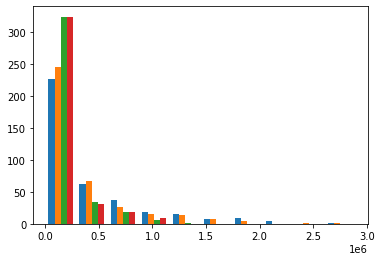

In [10342]:
# plt.hist(test['Target']);
plt.hist(test[['sellin','sales_lead_1','sales_lead_2','sales_lead_3']]);

In [10343]:
test[test['sku_name'] == 'ARTILANDARTI']

,sku_name,month,sellin,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3,sales_ewm_alpha_098_lag_1,sales_ewm_alpha_098_lag_3,sales_ewm_alpha_07_lag_1,sales_ewm_alpha_07_lag_3,sales_ewm_alpha_02_lag_1,sales_ewm_alpha_02_lag_3,sales_expanding_mean_,weighting
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-01,ARTILANDARTI,11,1.438722e+06,4009454.0,171197.0,1580280.0,14.060333,13.417448,16.201004,14.438193,14.17838,967541.17529,737619.172424,533473.078016,13.808549,14.356636,14.566242,11.55541,14.060333,14.046767,11.647964,13.81726,12.859591,14.013251,14.147489,14.796218,13.803179


In [10344]:
test[test['sku_name'] == 'LARILENEWHIT']

,sku_name,month,sellin,starting_inventory,sellout,onhand_inventory,sales_lag_1,sales_lag_2,sales_lag_4,sales_lag_8,sales_lag_12,sales_lead_1,sales_lead_2,sales_lead_3,sales_roll_mean_4,sales_roll_mean_8,rolling_mean_lag_2,sales_roll_min_3,sales_roll_max_3,sales_ewm_alpha_098_lag_1,sales_ewm_alpha_098_lag_3,sales_ewm_alpha_07_lag_1,sales_ewm_alpha_07_lag_3,sales_ewm_alpha_02_lag_1,sales_ewm_alpha_02_lag_3,sales_expanding_mean_,weighting
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-01,LARILENEWHIT,11,23021.20113,185379.0,0.0,0.0,9.40566,NaN,NaN,NaN,NaN,50835.274446,54405.630153,34846.420069,9.40566,9.40566,NaN,9.40566,9.40566,9.40566,NaN,9.40566,NaN,9.40566,NaN,9.40566,NaN


In [10345]:
result = test[['sku_name','sellin','sales_lead_1','sales_lead_2','sales_lead_3']]

In [10346]:
result

,sku_name,sellin,sales_lead_1,sales_lead_2,sales_lead_3
dates,,,,,
2021-11-01,ABEAHAMASHL,7.870481e+04,8.179741e+04,5.645630e+04,9.110092e+04
2021-11-01,ABEENNEARMAZZ,1.601797e+05,1.890728e+05,5.871239e+04,5.527731e+04
2021-11-01,ABEETTEABE,1.273955e+06,1.187503e+06,5.917277e+05,5.980056e+05
2021-11-01,ABERTHAKEVAZZ,6.080755e+05,4.435621e+05,1.776033e+05,1.174801e+05
2021-11-01,ABEWARDREYZZ,8.386461e+04,5.507689e+04,3.039043e+04,2.499480e+04
2021-11-01,ALBEATHAPENNZZ,3.201365e+05,2.412991e+05,8.250278e+04,6.642889e+04
2021-11-01,ALBELINAJULI,1.144347e+06,1.055681e+06,5.016392e+05,4.097681e+05
2021-11-01,ALBERRONLYNEZZ,1.846278e+05,1.877638e+05,5.562906e+04,6.033285e+04
2021-11-01,ALBERRONMAYN,1.288719e+05,4.286318e+04,3.565237e+04,3.138196e+04


In [10347]:
result = result.rename(columns = {'sellin': '11_2021', 'sales_lead_1':'12_2021','sales_lead_2':'1_2022','sales_lead_3':'2_2022'})

In [10348]:
result = pd.melt(result, id_vars = 'sku_name',var_name= 'dates', value_name = 'Target', value_vars = ['11_2021','12_2021','1_2022','2_2022'])

In [10349]:
result['Item_ID'] = result['sku_name']+'_'+result['dates']


In [10350]:
result.shape

(1528, 4)

In [10351]:
result[['Item_ID','Target']].to_csv('mysubmission.csv',index = False)

In [10352]:
result['Target'].median()

112249.76703992748